**Phase 3**


---



#Import Required Libraries:

---



In [ ]:
# Import pandas library
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import tree
import pickle
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np
from scipy.cluster.hierarchy import fcluster, linkage, dendrogram
from yellowbrick.cluster import SilhouetteVisualizer
import seaborn as sns
from sklearn.pipeline import make_pipeline
!pip install kneed
import kneed
from kneed import KneeLocator
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.preprocessing import scale
import pickle



#Read File:


---


This section loads the preprocessed dataset for analysis. The dataset, saved as "Processed_dataset.csv," was prepared in a prior phase where necessary preprocessing steps (e.g., data cleaning, normalization, feature selection etc ) were applied to ensure data quality and relevance. The pd.read_csv() function reads the CSV file into a pandas DataFrame named after we preprocessed dataset.

In [ ]:
#Loading dataset
# pd.read_csv() --> used to load a comma separated file (csv) into a dataframe
# -------------------------------------------------
Dataset=pd.read_csv("Processed_dataset.csv")
print(Dataset)

              Age  Gender Family_Diabetes highBP      PhysicallyActive  \
0           50-59    Male              no    yes        one hr or more   
1           50-59    Male              no    yes  less than half an hr   
2           40-49    Male              no     no        one hr or more   
3           50-59    Male              no     no        one hr or more   
4           40-49    Male              no     no  less than half an hr   
..            ...     ...             ...    ...                   ...   
904  less than 40    Male             yes     no  more than half an hr   
905   60 or older    Male             yes    yes  more than half an hr   
906   60 or older    Male              no    yes                  none   
907   60 or older    Male              no    yes  less than half an hr   
908   60 or older  Female             yes    yes        one hr or more   

          BMI Smoking Alcohol     Sleep  SoundSleep RegularMedicine  \
0    0.800000      no      no  0.571429 

#Classification:

**Encoding:**


---



This section encodes all non-numeric (categorical) attributes in the dataset, except for the class label, to prepare the data for building a Decision Tree model. Since the model requires numerical input, we applied label encoding to convert each categorical attribute into integer values. We create a copy of the original dataset (copy_of_dataset) to preserve the original data. Using LabelEncoder, each categorical attribute (e.g., Age, Gender, Family_Diabetes, etc.) is transformed into a numeric format that the model can process. This step ensures compatibility with the model while retaining the information from the original categorical data.

In [ ]:
copy_of_dataset=Dataset.copy()
encoder=LabelEncoder()

# we started encoding all non numeric attributes so we can perform filter selection & use the heatpmap
copy_of_dataset["Age"]=encoder.fit_transform(copy_of_dataset["Age"])

copy_of_dataset["Gender"]=encoder.fit_transform(copy_of_dataset["Gender"])

copy_of_dataset["Family_Diabetes"]=encoder.fit_transform(copy_of_dataset["Family_Diabetes"])

copy_of_dataset["highBP"]=encoder.fit_transform(copy_of_dataset["highBP"])

copy_of_dataset["PhysicallyActive"]=encoder.fit_transform(copy_of_dataset["PhysicallyActive"])

copy_of_dataset["Smoking"]=encoder.fit_transform(copy_of_dataset["Smoking"])

copy_of_dataset["Alcohol"]=encoder.fit_transform(copy_of_dataset["Alcohol"])

copy_of_dataset["RegularMedicine"]=encoder.fit_transform(copy_of_dataset["RegularMedicine"])

copy_of_dataset["JunkFood"]=encoder.fit_transform(copy_of_dataset["JunkFood"])

copy_of_dataset["BPLevel"]=encoder.fit_transform(copy_of_dataset["BPLevel"])

copy_of_dataset["UriationFreq"]=encoder.fit_transform(copy_of_dataset["UriationFreq"])

copy_of_dataset["Stress"]=encoder.fit_transform(copy_of_dataset["Stress"])


**Feature Selection:**


---
In this section, we split the dataset into features (X) and the target variable (y) in preparation for building a Decision Tree model. The feature set (X) includes all columns except the last one ("Diabetic"), which is the target variable (y).
* Split the dataset into features and target variable: fn' stores the list of
feature names, excluding the last column ('Diabetic'). X' contains the feature set, while 'y' contains only the target variable ( class label).



In [ ]:
#split dataset in features and target variable
fn = copy_of_dataset.keys().tolist() [:-1] #dataset columns names without last column 'Diabetic'
X = copy_of_dataset[fn] # Features names
y = copy_of_dataset['Diabetic'] # Target variable

**Splitting Data:**


---
This section partitions the dataset into three different training and test splits for model evaluation.
Each split is based on a different ratio, allowing us to test model performance under various training
data proportions. The splits include 70% training - 30% testing, 60% training - 40% testing, and  80% training - 20% testing.

1. Partition 1: 70% of data is used for training and 30% for testing.
2. Partition 2: 60% of data is used for training and 40% for testing.
3. Partition 3: 80% of data is used for training and 20% for testing.

The train_test_split() function is used to randomly split the dataset into training (X_PartitonNumberTraining, Y_PartitonNumberTraining)
and test sets (X_PartitonNumberTest, Y_PartitonNumberTest) for each partition. Setting random_state=1 ensures consistency across splits, allowing reproducible results.


Decision Tree classifiers will be later build on these three different partitions of the dataset (70-30, 60-40, and 80-20 splits for training and testing) using two classification criteria: Entropy and Gini. Each partition helps analyze the model’s performance under varying amounts of training data, enabling comparisons across criteria and partitions.


In [ ]:
# Split dataset into training set and test set

# Partiton 1: 70% training and 30% test
# ---------------------------------------------
X_PartitonOneTraining, X_PartitonOneTest, Y_PartitonOneTraining, Y_PartitonOneTest = train_test_split(X, y, test_size=0.3, random_state=1)


# Partiton 2: 60% training and 40% test
# ---------------------------------------------
X_PartitonTwoTraining, X_PartitonTwoTest, Y_PartitonTwoTraining, Y_PartitonTwoTest = train_test_split(X, y, test_size=0.4, random_state=1)


# Partiton 3: 80% training and 20% test
# ---------------------------------------------
X_PartitonThreeTraining, X_PartitonThreeTest, Y_PartitonThreeTraining, Y_PartitonThreeTest = train_test_split(X, y, test_size=0.2, random_state=1)




**Building Decision Tree Model:**


---
This section builds Decision Tree classifiers on three different partitions of the dataset (70-30, 60-40, and 80-20 splits for training and testing) using two classification criteria: Entropy and Gini. Each partition helps analyze the model’s performance under varying amounts of training data, enabling comparisons across criteria and partitions.

 1. Partition 1: 70% Training and 30% Testing

 • Entropy Criterion:

 • A Decision Tree classifier (Classifier_Entropy_PartitonOne) is created using the Entropy criterion. This criterion measures the information gain at each node split, aiming to maximize information gain and produce a more informative model.

 • The model is trained using the 70% training subset (X_PartitonOneTraining, Y_PartitonOneTraining), where X_PartitonOneTraining contains the feature set and Y_PartitonOneTraining contains the class labels.

 • The classifier then predicts class labels on the 30% testing subset (X_PartitonOneTest), generating a set of predictions (Y_predEntropy_PartitonOne) for evaluation.

 • Gini Criterion:

 • A second Decision Tree classifier (Classifier_Gini_PartitonOne) is created using the Gini criterion, which minimizes impurity by choosing splits that reduce the probability of misclassification.

 • This model is also trained on X_PartitonOneTraining and Y_PartitonOneTraining, and then tested on X_PartitonOneTest to generate predictions (Y_predGini_PartitonOne).
 2. Partition 2: 60% Training and 40% Testing

 • Entropy Criterion:

 • A Decision Tree classifier (Classifier_Entropy_PartitonTwo) is created with the Entropy criterion.
 • The model is trained on the 60% training subset (X_PartitonTwoTraining,Y_PartitonTwoTraining), followed by predictions on the 40% testing subset (X_PartitonTwoTest). The predicted outcomes are saved as Y_predEntropy_PartitonTwo.

 • Gini Criterion:

 • Another classifier (Classifier_Gini_PartitonTwo) is created using the Gini criterion for this split.

 • Trained on X_PartitonTwoTraining,Y_PartitonTwoTraining, the classifier predicts on X_PartitonTwoTest, producing the results (Y_predGini_PartitonTwo).
 3. Partition 3: 80% Training and 20% Testing

 • Entropy Criterion:

 • A Decision Tree classifier (Classifier_Entropy_PartitonThree) is created using the Entropy criterion.

 • This classifier is trained on the 80% training subset (X_PartitonThreeTraining,Y_PartitonThreeTraining) and tested on the 20% testing subset (X_PartitonThreeTest), yielding predictions stored as Y_predEntropy_PartitonThree.

 • Gini Criterion:

 • A final classifier (Classifier_Gini_PartitonThree) is built with the Gini criterion.

 • This model is trained using X_PartitonThreeTraining,Y_PartitonThreeTraining and then tested on X_PartitonThreeTest, resulting in predictions saved as Y_predGini_PartitonThree.

Purpose of Each Criterion:

 • Entropy: Measures information gain at each split. It favors splits that maximize the differentiation of classes, providing a potentially deeper understanding of class separations within the dataset.

 • Gini: Measures the degree of impurity at each split. It minimizes the probability of misclassification, focusing on reducing the mixed nature of classes in each node, which can sometimes result in a simpler tree.

Outcome:

This approach provides insights into how each criterion (Entropy and Gini) performs under different training and testing splits, allowing evaluation of model robustness, predictive accuracy, and consistency across varying proportions of training data.


In [ ]:
# Partiton 1: 70% training and 30% test
# -----------------------------------------------------

# ------------------- Entropy -------------------
# Create Decision Tree classifer object using entropy
Classifier_Entropy_PartitonOne = DecisionTreeClassifier(criterion="entropy",random_state=1)
# Train Decision Tree Classifer
Classifier_Entropy_PartitonOne = Classifier_Entropy_PartitonOne.fit(X_PartitonOneTraining,Y_PartitonOneTraining)
#Predict the response for test dataset
Y_predEntropy_PartitonOne = Classifier_Entropy_PartitonOne.predict(X_PartitonOneTest)




# Partiton 2: 60% training and 40% test
# -----------------------------------------------------

# ------------------- Entropy -------------------
# Create Decision Tree classifer object using entropy
Classifier_Entropy_PartitonTwo = DecisionTreeClassifier(criterion="entropy",random_state=1)
# Train Decision Tree Classifer
Classifier_Entropy_PartitonTwo = Classifier_Entropy_PartitonTwo.fit(X_PartitonTwoTraining,Y_PartitonTwoTraining)
#Predict the response for test dataset
Y_predEntropy_PartitonTwo = Classifier_Entropy_PartitonTwo.predict(X_PartitonTwoTest)



# Partiton 3: 80% training and 20% test
# -----------------------------------------------------

# ------------------- Entropy -------------------
# Create Decision Tree classifer object using entropy
Classifier_Entropy_PartitonThree = DecisionTreeClassifier(criterion="entropy",random_state=1)
# Train Decision Tree Classifer
Classifier_Entropy_PartitonThree = Classifier_Entropy_PartitonThree.fit(X_PartitonThreeTraining,Y_PartitonThreeTraining)
#Predict the response for test dataset
Y_predEntropy_PartitonThree = Classifier_Entropy_PartitonThree.predict(X_PartitonThreeTest)





In [ ]:
# Partiton 1: 70% training and 30% test
# -----------------------------------------------------
# -------------------- Gini ----------------------
# Create Decision Tree classifer object using gini
Classifier_Gini_PartitonOne = DecisionTreeClassifier(random_state=1)
# Train Decision Tree Classifer
Classifier_Gini_PartitonOne= Classifier_Gini_PartitonOne.fit(X_PartitonOneTraining,Y_PartitonOneTraining)
#Predict the response for test dataset
Y_predGini_PartitonOne = Classifier_Gini_PartitonOne.predict(X_PartitonOneTest)


# Partiton 2: 60% training and 40% test
# -----------------------------------------------------
# -------------------- Gini ----------------------
# Create Decision Tree classifer object using gini
Classifier_Gini_PartitonTwo = DecisionTreeClassifier(random_state=1)
# Train Decision Tree Classifer
Classifier_Gini_PartitonTwo= Classifier_Gini_PartitonTwo.fit(X_PartitonTwoTraining,Y_PartitonTwoTraining)
#Predict the response for test dataset
Y_predGini_PartitonTwo = Classifier_Gini_PartitonTwo.predict(X_PartitonTwoTest)

# Partiton 3: 80% training and 20% test
# -----------------------------------------------------
# -------------------- Gini ----------------------
# Create Decision Tree classifer object using gini
Classifier_Gini_PartitonThree = DecisionTreeClassifier(random_state=1)
# Train Decision Tree Classifer
Classifier_Gini_PartitonThree= Classifier_Gini_PartitonThree.fit(X_PartitonThreeTraining,Y_PartitonThreeTraining)
#Predict the response for test dataset
Y_predGini_PartitonThree = Classifier_Gini_PartitonThree.predict(X_PartitonThreeTest)


**Evaluating The Model:**


---
The results indicate that both decision tree models, using Entropy and Gini as splitting criteria, perform consistently well across different train-test splits, achieving high accuracy in each case. For the 70-30 split, the Gini criterion (0.9634) slightly outperforms Entropy (0.9597), while for the 60-40 split, both criteria yield identical accuracy (0.9258). In the 80-20 split, both models achieve their highest accuracy (0.9670), suggesting improved performance with a larger training set. Overall, the similar accuracy scores across criteria imply that either splitting criterion can be used effectively for this dataset.

In [ ]:
# Partiton 1: 70% training and 30% test (Model Accuracy)
# -----------------------------------------------------
print("Accuracy For Entropy (70% training and 30% test): ",metrics. accuracy_score(Y_PartitonOneTest, Y_predEntropy_PartitonOne) )
print("Accuracy For Gini (70% training and 30% test): ", metrics. accuracy_score(Y_PartitonOneTest, Y_predGini_PartitonOne) )

# Partiton 2: 60% training and 40% test (Model Accuracy)
# -----------------------------------------------------
print("Accuracy For Entropy (60% training and 40% test): ",metrics. accuracy_score(Y_PartitonTwoTest, Y_predEntropy_PartitonTwo) )
print("Accuracy For Gini (60% training and 40% test): ", metrics. accuracy_score(Y_PartitonTwoTest, Y_predGini_PartitonTwo) )

# Partiton 3: 80% training and 20% test (Model Accuracy)
# -----------------------------------------------------
print("Accuracy For Entropy (80% training and 20% test): ",metrics. accuracy_score(Y_PartitonThreeTest, Y_predEntropy_PartitonThree) )
print("Accuracy For Gini (80% training and 20% test): ", metrics. accuracy_score(Y_PartitonThreeTest, Y_predGini_PartitonThree) )


Accuracy For Entropy (70% training and 30% test):  0.9597069597069597
Accuracy For Gini (70% training and 30% test):  0.9633699633699634
Accuracy For Entropy (60% training and 40% test):  0.9258241758241759
Accuracy For Gini (60% training and 40% test):  0.9258241758241759
Accuracy For Entropy (80% training and 20% test):  0.967032967032967
Accuracy For Gini (80% training and 20% test):  0.967032967032967


**Confusion Matrix:**


---


The code computes and displays confusion matrices for evaluating the performance of two decision tree models (using Entropy and Gini criteria)  across three different data partitions. Each partition has a different train-test split: 70%-30%, 60%-40%, and 80%-20%. The confusion matrices for each partition and criterion reveal the models’ predictions against the true labels, showing the counts of True Positives, True Negatives, False Positives, and False Negatives.


* For Partition 1 (70% training, 30% testing), the Entropy-based model shows aconfusion matrix of [[185, 4], [7, 77]], indicating 185 true negatives, 77 true positives, 4 false positives, and 7 false negatives. The Gini-based model has a confusion matrix of [[186, 3], [7, 77]], similar to Entropy but with one less false positive and one more true negative.

* In Partition 2 (60% training, 40% testing), both models have identical confusion matrices of [[252, 8], [19, 85]], with 252 true negatives, 85 true positives, 8 false positives, and 19 false negatives. This similarity suggests both models perform equivalently on this split.

* For Partition 3 (80% training, 20% testing), the confusion matrices for both criteria are also identical: [[127, 1], [5, 49]], where there are 127 true negatives, 49 true positives, 1 false positive, and 5 false negatives. These results show a high level of accuracy, with minimal misclassifications, particularly in this partition with the largest training set.

Overall, the confusion matrices across all partitions demonstrate that both Entropy and Gini criteria yield similar performance, with consistent results across different train-test splits. The minor differences in certain partitions do not significantly impact overall model effectiveness, indicating robustness in classification performance for both criteria.

[[185   4]
 [  7  77]]
[[186   3]
 [  7  77]]
[[252   8]
 [ 19  85]]
[[252   8]
 [ 19  85]]
[[127   1]
 [  5  49]]
[[127   1]
 [  5  49]]


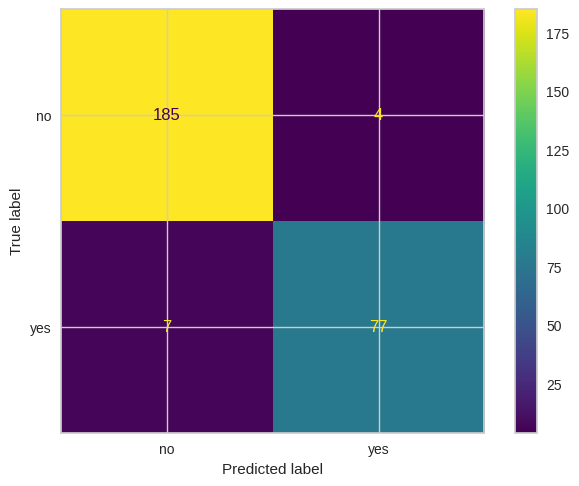

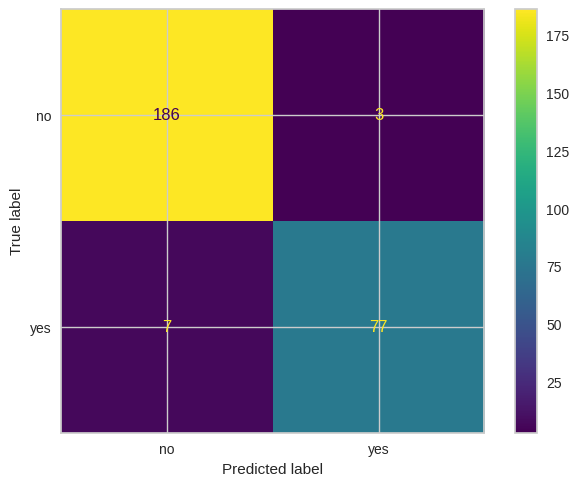

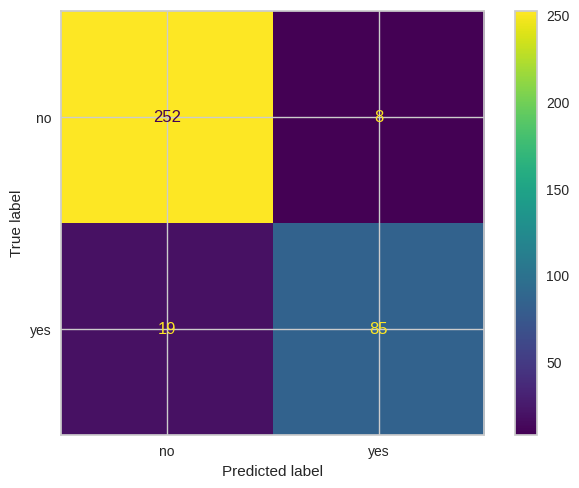

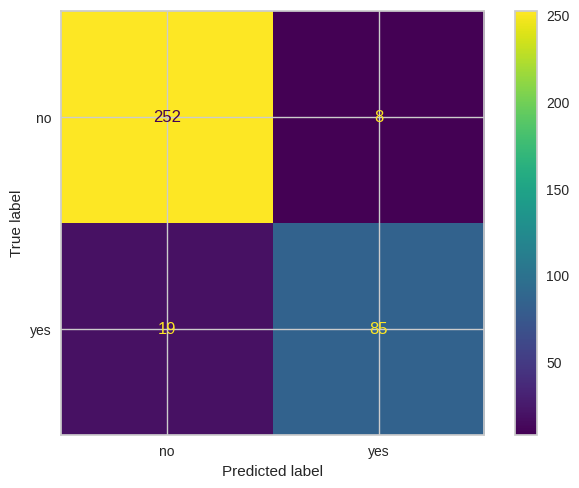

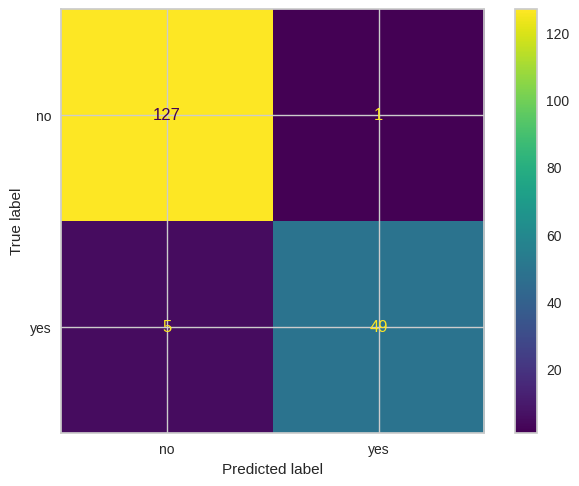

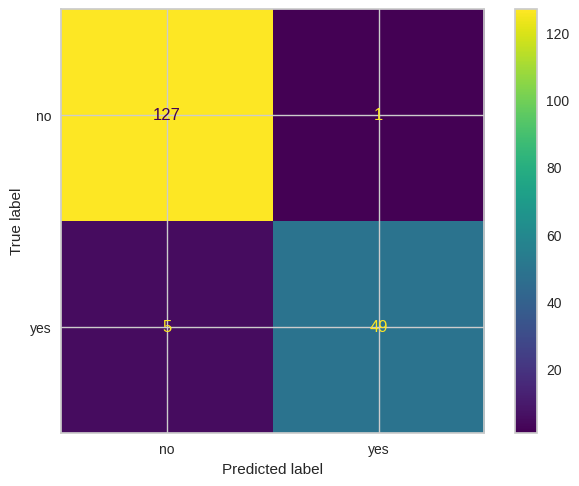

In [ ]:
ClassNames=copy_of_dataset['Diabetic'].unique() #classes_names

# Partiton 1: 70% training and 30% test (Confusion Matrix)
# -------------------------------------------------------
#compute and print the confusion matrix (Entropy)
Confusion_Matrix_Entropy_PartitonOne= confusion_matrix(Y_PartitonOneTest, Y_predEntropy_PartitonOne)
print (Confusion_Matrix_Entropy_PartitonOne)

# create a confusion matrix display object
display = ConfusionMatrixDisplay.from_estimator(Classifier_Entropy_PartitonOne, X_PartitonOneTest, Y_PartitonOneTest, display_labels=ClassNames)

#compute and print the confusion matrix (Gini)
Confusion_Matrix_Gini_PartitonOne= confusion_matrix(Y_PartitonOneTest, Y_predGini_PartitonOne)
print (Confusion_Matrix_Gini_PartitonOne)
# create a confusion matrix display object
display = ConfusionMatrixDisplay.from_estimator(Classifier_Gini_PartitonOne, X_PartitonOneTest, Y_PartitonOneTest, display_labels=ClassNames)


# Partiton 2: 60% training and 40% test (Confusion Matrix)
# -------------------------------------------------------
#compute and print the confusion matrix (Entropy)
Confusion_Matrix_Entropy__PartitonTwo= confusion_matrix(Y_PartitonTwoTest, Y_predEntropy_PartitonTwo)
print (Confusion_Matrix_Entropy__PartitonTwo)

# create a confusion matrix display object
display = ConfusionMatrixDisplay.from_estimator(Classifier_Entropy_PartitonTwo, X_PartitonTwoTest, Y_PartitonTwoTest, display_labels=ClassNames)

#compute and print the confusion matrix (Gini)
Confusion_Matrix_Gini__PartitonTwo= confusion_matrix(Y_PartitonTwoTest, Y_predGini_PartitonTwo)
print (Confusion_Matrix_Gini__PartitonTwo)
# create a confusion matrix display object
display = ConfusionMatrixDisplay.from_estimator(Classifier_Gini_PartitonTwo, X_PartitonTwoTest, Y_PartitonTwoTest, display_labels=ClassNames)

# Partiton 3: 80% training and 20% test (Confusion Matrix)
# -------------------------------------------------------
#compute and print the confusion matrix (Entropy)
Confusion_Matrix_Entropy_PartitonThree= confusion_matrix(Y_PartitonThreeTest, Y_predEntropy_PartitonThree)
print (Confusion_Matrix_Entropy_PartitonThree)

# create a confusion matrix display object
display = ConfusionMatrixDisplay.from_estimator(Classifier_Entropy_PartitonThree, X_PartitonThreeTest, Y_PartitonThreeTest, display_labels=ClassNames)

#compute and print the confusion matrix (Gini)
Confusion_Matrix_Gini_PartitonThree= confusion_matrix(Y_PartitonThreeTest, Y_predGini_PartitonThree)
print (Confusion_Matrix_Gini_PartitonThree)
# create a confusion matrix display object
display = ConfusionMatrixDisplay.from_estimator(Classifier_Gini_PartitonThree, X_PartitonThreeTest, Y_PartitonThreeTest, display_labels=ClassNames)



**Senstivity (Recall) ,Specificity and Precision**


---

The code calculates and compares the performance metrics—Sensitivity (Recall), Specificity, and Precision for decision trees built using the Gini and Entropy criteria across three data partitions with different training-to-testing splits: Partition 1 (70%-30%), Partition 2 (60%-40%), and Partition 3 (80%-20%). The results show that in Partition 1, both Gini and Entropy achieved high and closely aligned metrics, indicating excellent model performance. In Partition 2, Sensitivity and Specificity were slightly lower compared to Partition 1, reflecting a marginal drop in the model’s ability to detect true positives and true negatives as the test set size increased. Partition 3, with the highest training data ratio (80%-20%), achieved high and nearly identical performance for both criteria, emphasizing the effectiveness of larger training datasets in improving model reliability. This analysis highlights how training-test splits and criteria selection impact classification performance.

In [ ]:
# Partiton 1: 70% training and 30% test
# -------------------------------------------------------
# -- Entropy
print("--------------- Partiton 1 (Entropy) --------------- ")
TP=Confusion_Matrix_Entropy_PartitonOne[1,1]
TN=Confusion_Matrix_Entropy_PartitonOne[0,0]
FP=Confusion_Matrix_Entropy_PartitonOne[0,1]
FN=Confusion_Matrix_Entropy_PartitonOne[1,0]

# Senstivity (Recall)
Senstivity=TP/(TP+FN)
print("Senstivity(Entopy): ",Senstivity)

# Specificity
Specificity=TN/(TN+FP)
print("Specificity(Entopy): ",Specificity)

# Percision
Percision=TP/(TP+FP)
print("Percision(Entopy): ",Percision)


# -- Gini
print("--------------- Partiton 1 (Gini) --------------- ")
TP=Confusion_Matrix_Gini_PartitonOne[1,1]
TN=Confusion_Matrix_Gini_PartitonOne[0,0]
FP=Confusion_Matrix_Gini_PartitonOne[0,1]
FN=Confusion_Matrix_Gini_PartitonOne[1,0]

# Senstivity (Recall)
Senstivity=TP/(TP+FN)
print("Senstivity(Gini): ",Senstivity)

# Specificity
Specificity=TN/(TN+FP)
print("Specificity(Gini): ",Specificity)

# Percision
Percision=TP/(TP+FP)
print("Percision(Gini): ",Percision)



print()
# Partiton 2: 60% training and 40% test
# -------------------------------------------------------
# -- Entropy
print("--------------- Partiton 2 (Entropy) --------------- ")
TP=Confusion_Matrix_Entropy__PartitonTwo[1,1]
TN=Confusion_Matrix_Entropy__PartitonTwo[0,0]
FP=Confusion_Matrix_Entropy__PartitonTwo[0,1]
FN=Confusion_Matrix_Entropy__PartitonTwo[1,0]

# Senstivity (Recall)
Senstivity=TP/(TP+FN)
print("Senstivity(Entopy): ",Senstivity)

# Specificity
Specificity=TN/(TN+FP)
print("Specificity(Entopy): ",Specificity)

# Percision
Percision=TP/(TP+FP)
print("Percision(Entopy): ",Percision)


# -- Gini
print("--------------- Partiton 2 (Gini) --------------- ")
TP=Confusion_Matrix_Gini__PartitonTwo[1,1]
TN=Confusion_Matrix_Gini__PartitonTwo[0,0]
FP=Confusion_Matrix_Gini__PartitonTwo[0,1]
FN=Confusion_Matrix_Gini__PartitonTwo[1,0]

# Senstivity (Recall)
Senstivity=TP/(TP+FN)
print("Senstivity(Gini): ",Senstivity)

# Specificity
Specificity=TN/(TN+FP)
print("Specificity(Gini): ",Specificity)

# Percision
Percision=TP/(TP+FP)
print("Percision(Gini): ",Percision)

print()

# Partiton 3: 80% training and 20% test
# -------------------------------------------------------
# -- Entropy
print("--------------- Partiton 3 (Entropy) --------------- ")
TP=Confusion_Matrix_Entropy_PartitonThree[1,1]
TN=Confusion_Matrix_Entropy_PartitonThree[0,0]
FP=Confusion_Matrix_Entropy_PartitonThree[0,1]
FN=Confusion_Matrix_Entropy_PartitonThree[1,0]

# Senstivity (Recall)
Senstivity=TP/(TP+FN)
print("Senstivity(Entopy): ",Senstivity)

# Specificity
Specificity=TN/(TN+FP)
print("Specificity(Entopy): ",Specificity)

# Percision
Percision=TP/(TP+FP)
print("Percision(Entopy): ",Percision)


# -- Gini
print("--------------- Partiton 3 (Gini) --------------- ")
TP=Confusion_Matrix_Gini_PartitonThree[1,1]
TN=Confusion_Matrix_Gini_PartitonThree[0,0]
FP=Confusion_Matrix_Gini_PartitonThree[0,1]
FN=Confusion_Matrix_Gini_PartitonThree[1,0]

# Senstivity (Recall)
Senstivity=TP/(TP+FN)
print("Senstivity(Gini): ",Senstivity)

# Specificity
Specificity=TN/(TN+FP)
print("Specificity(Gini): ",Specificity)

# Percision
Percision=TP/(TP+FP)
print("Percision(Gini): ",Percision)





--------------- Partiton 1 (Entropy) --------------- 
Senstivity(Entopy):  0.9166666666666666
Specificity(Entopy):  0.9788359788359788
Percision(Entopy):  0.9506172839506173
--------------- Partiton 1 (Gini) --------------- 
Senstivity(Gini):  0.9166666666666666
Specificity(Gini):  0.9841269841269841
Percision(Gini):  0.9625

--------------- Partiton 2 (Entropy) --------------- 
Senstivity(Entopy):  0.8173076923076923
Specificity(Entopy):  0.9692307692307692
Percision(Entopy):  0.9139784946236559
--------------- Partiton 2 (Gini) --------------- 
Senstivity(Gini):  0.8173076923076923
Specificity(Gini):  0.9692307692307692
Percision(Gini):  0.9139784946236559

--------------- Partiton 3 (Entropy) --------------- 
Senstivity(Entopy):  0.9074074074074074
Specificity(Entopy):  0.9921875
Percision(Entopy):  0.98
--------------- Partiton 3 (Gini) --------------- 
Senstivity(Gini):  0.9074074074074074
Specificity(Gini):  0.9921875
Percision(Gini):  0.98


**Visualizing And Saving Decision Tree:**


---



**Conclusion Regarding Partiton 1 Resulting Tree:**


---
In this analysis, we compared Decision Trees built using the Gini index and Entropy criteria on the same dataset partition. The Entropy-based tree tends to be more complex and deeper, as it maximizes information gain at each split, while the Gini-based tree is generally simpler, focusing on reducing impurity. The Gini criterion produces more balanced branches, which can help simplify the model structure, while the Entropy criterion adds more splits in certain branches, offering potentially higher classification detail. Both criteria prioritize key features but may handle less important ones differently, impacting the final decision boundaries. Overall, Gini is often preferable for simpler, faster models, while Entropy may provide more detailed classification.


Partiton 1: 70% training and 30% test (Entropy)


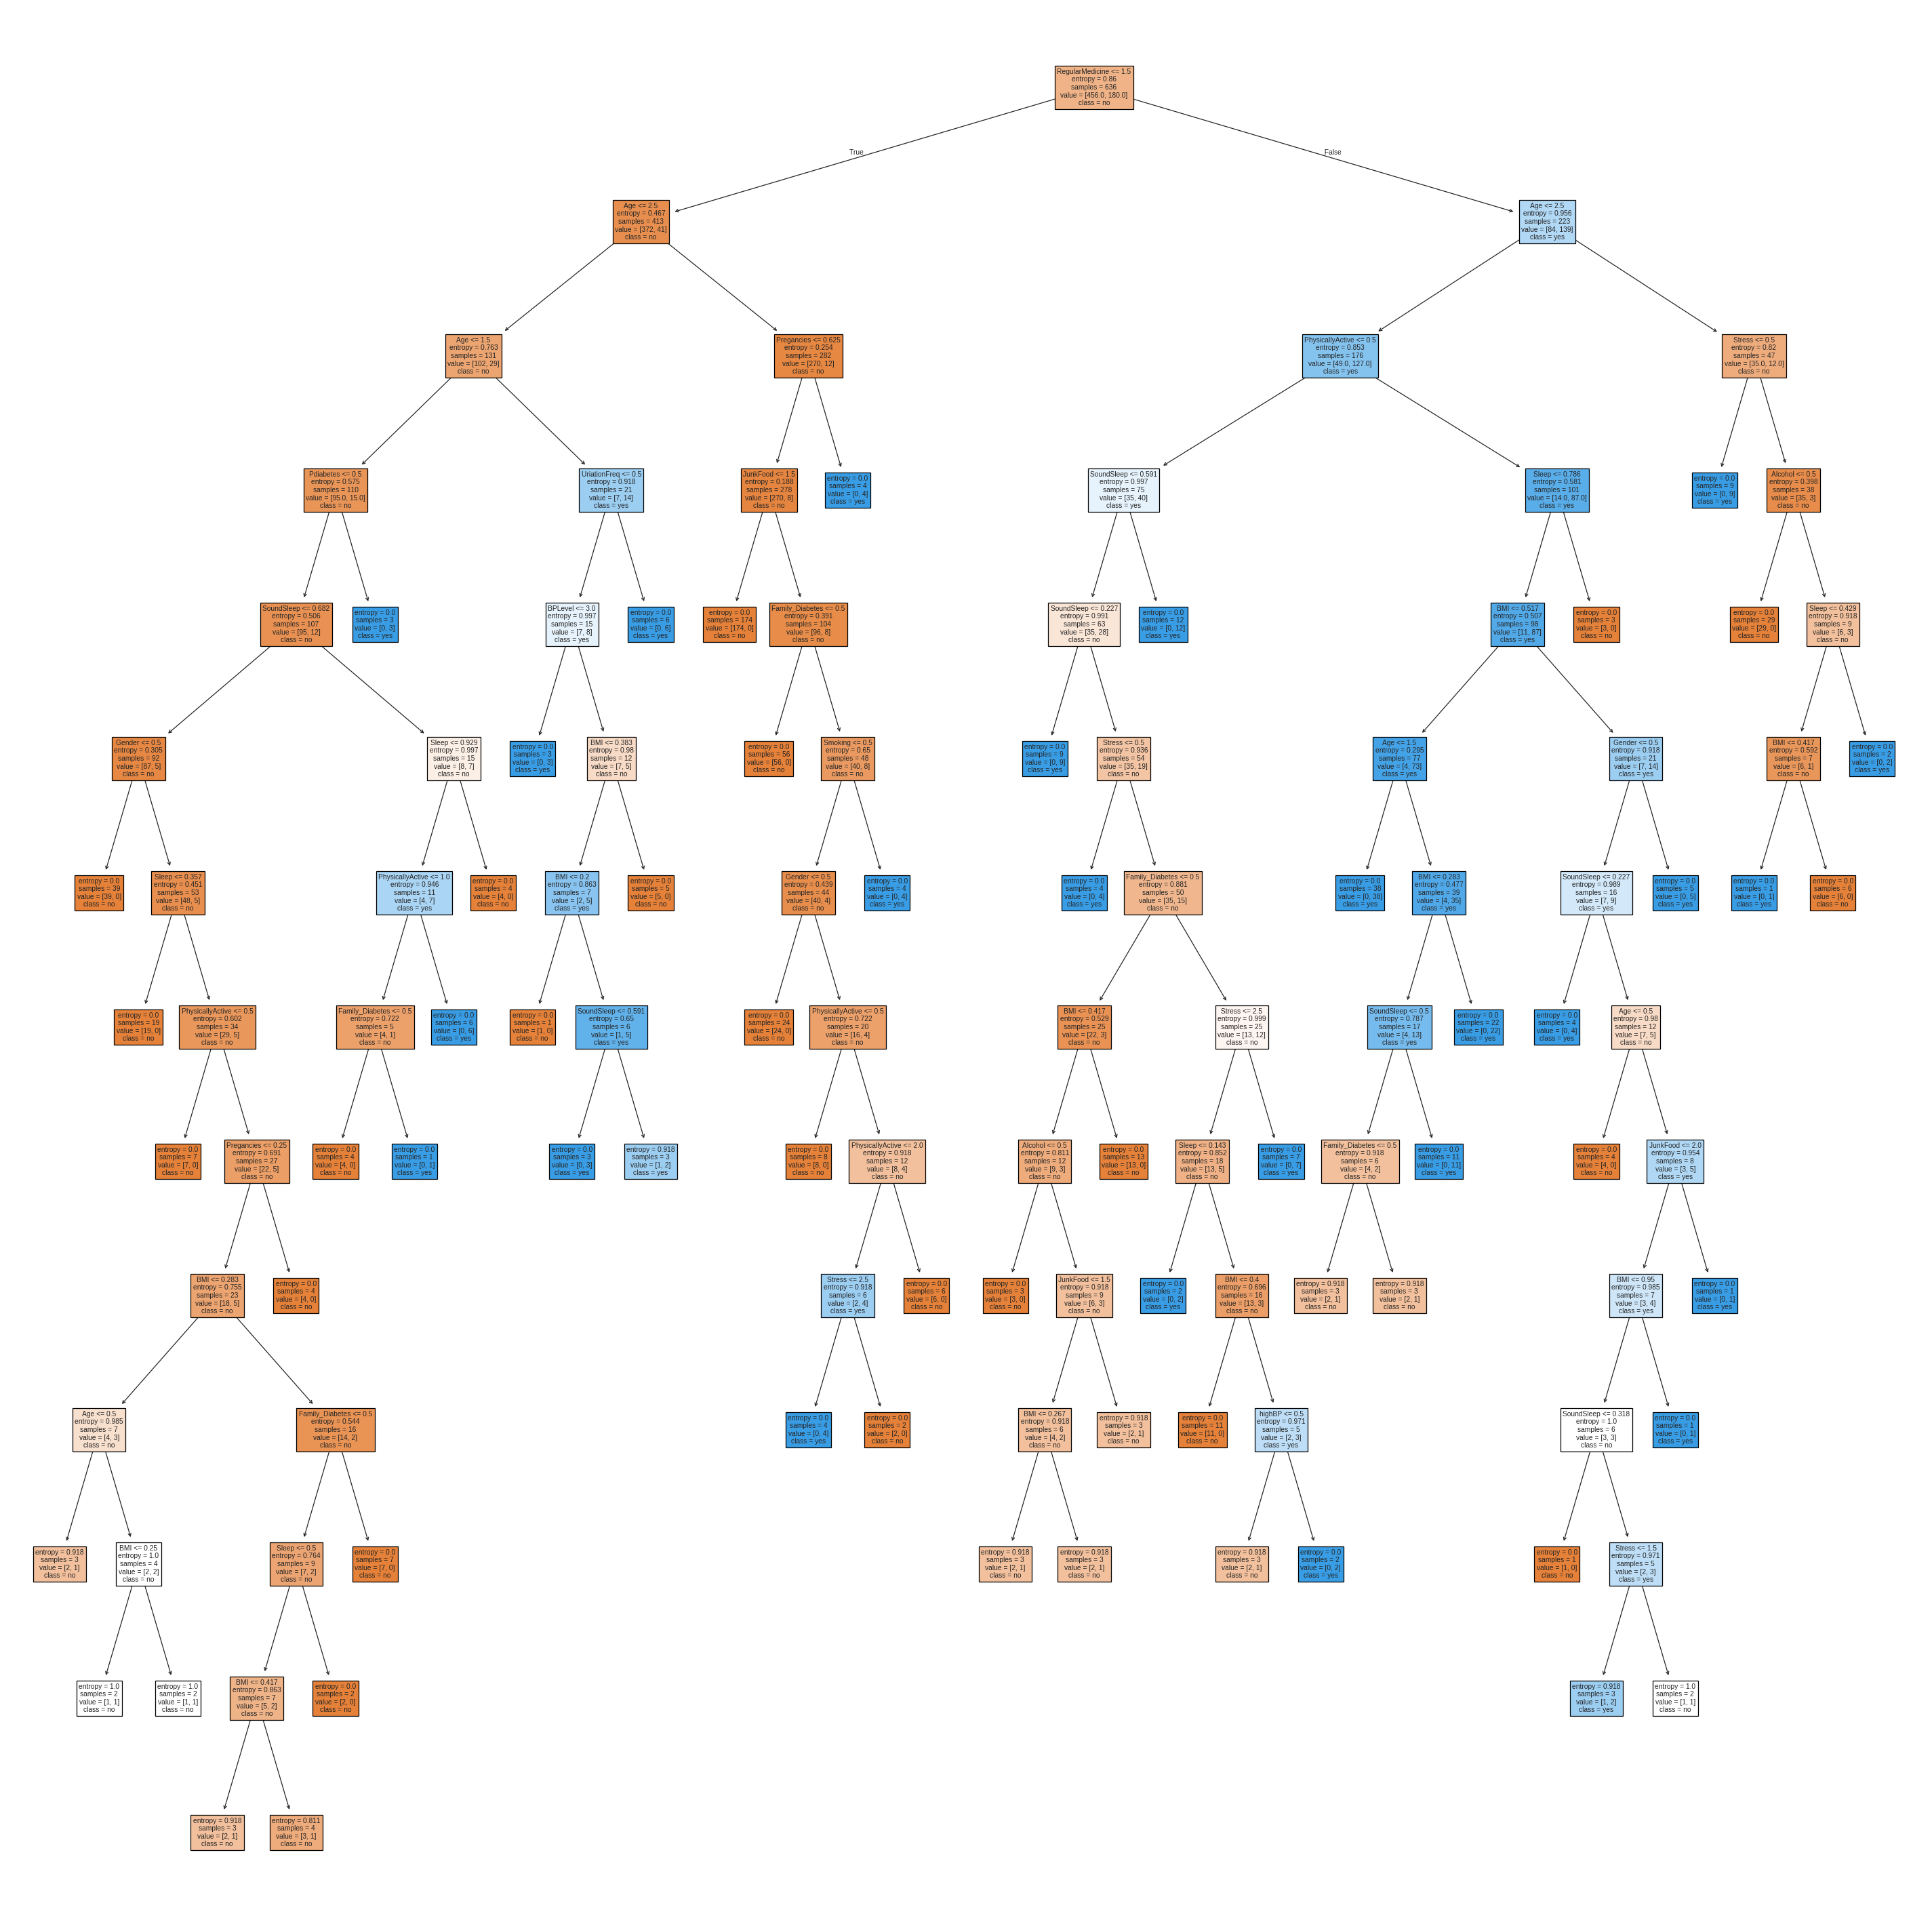

In [ ]:
# Entropy
# Setting dpi = 300 to make image clearer than default
fig, axes = plt.subplots(nrows = 1,ncols = 1, figsize = (12,12), dpi=300)
tree.plot_tree(Classifier_Entropy_PartitonOne,feature_names=fn,class_names=ClassNames,filled=True);


Partiton 1: 70% training and 30% test (Gini)


---



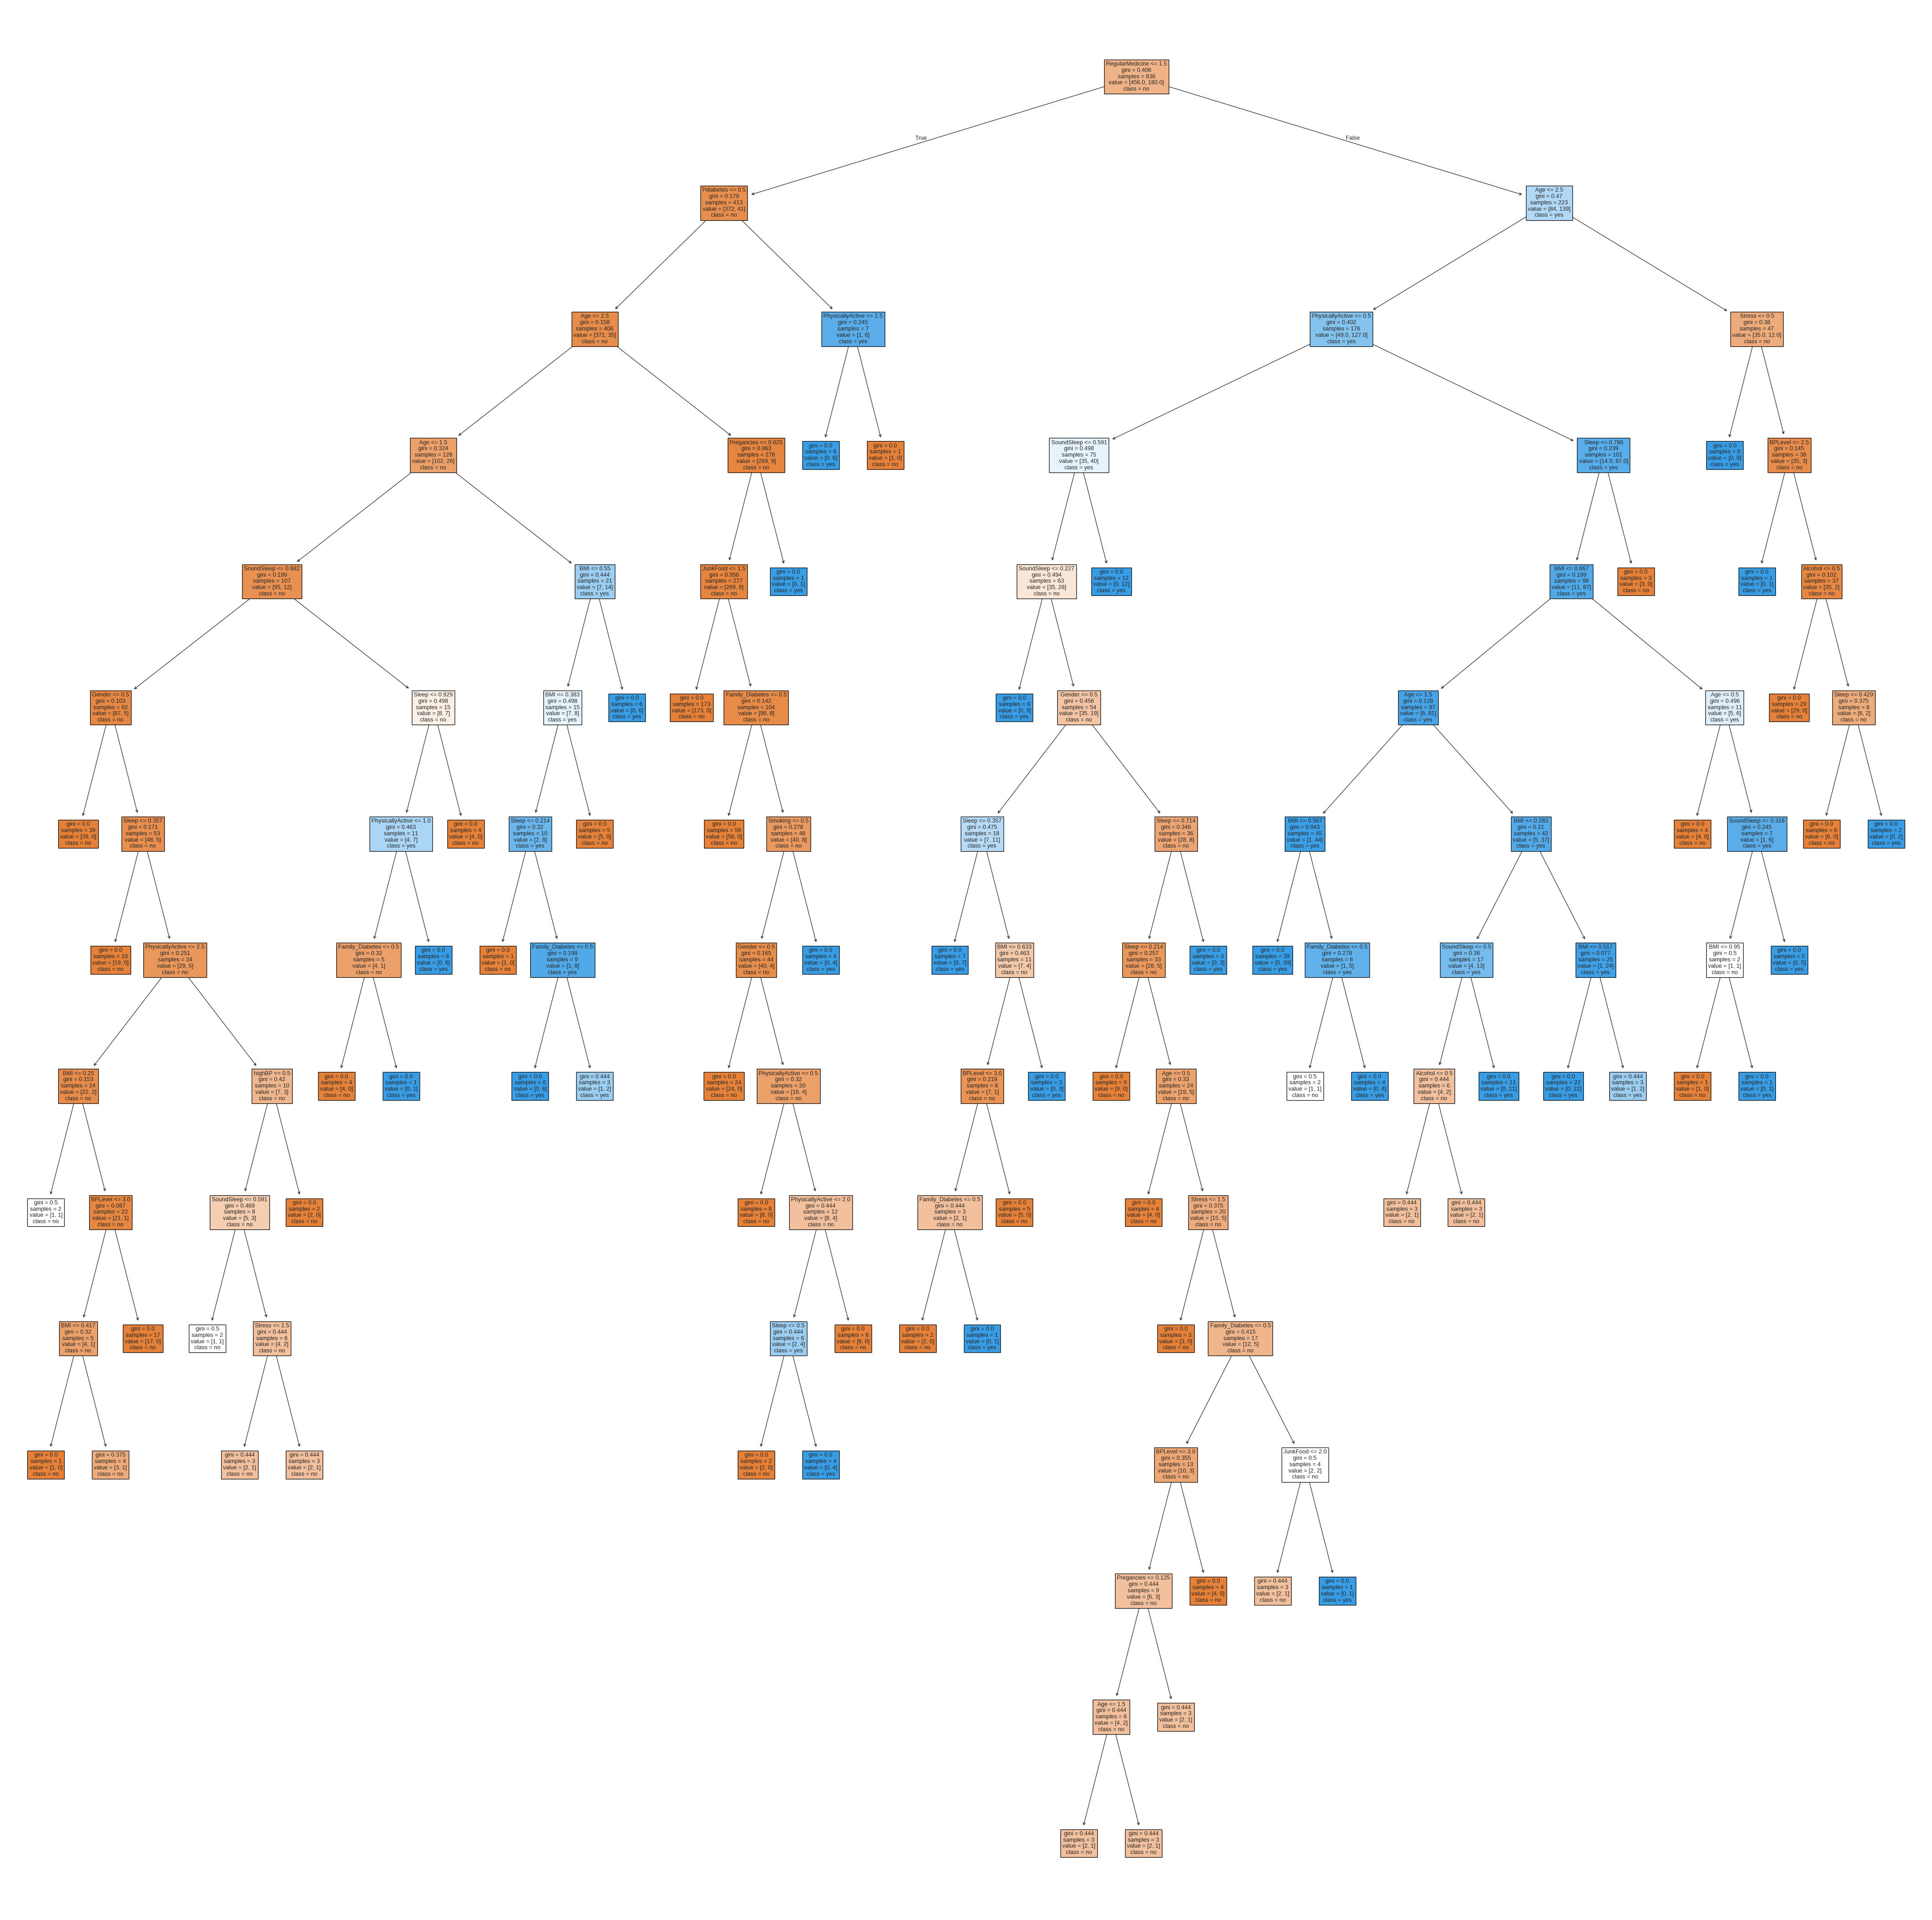

In [ ]:
# Gini
# Setting dpi = 300 to make image clearer than default
fig, axes = plt.subplots(nrows = 1,ncols = 1, figsize = (18,18), dpi=300)
tree.plot_tree(Classifier_Gini_PartitonOne,feature_names=fn,class_names=ClassNames,filled=True);


**Conclusion Regarding Partiton 2 Resulting Tree:**


---

The Gini index and entropy-based decision trees on the same dataset show notable differences:

 • Gini Tree: It is deeper and more complex, with more splits leading to potentially higher training accuracy. However, this complexity could lead to overfitting.

 • Entropy Tree: It’s more compact, suggesting better generalization and potentially reduced overfitting. This simpler structure might slightly lower training accuracy but improve performance on unseen data.

Conclusion: The Gini tree is detailed and may perform well on training data, while the entropy tree is more generalized.


Partiton 2: 60% training and 40% test (Entropy)


---



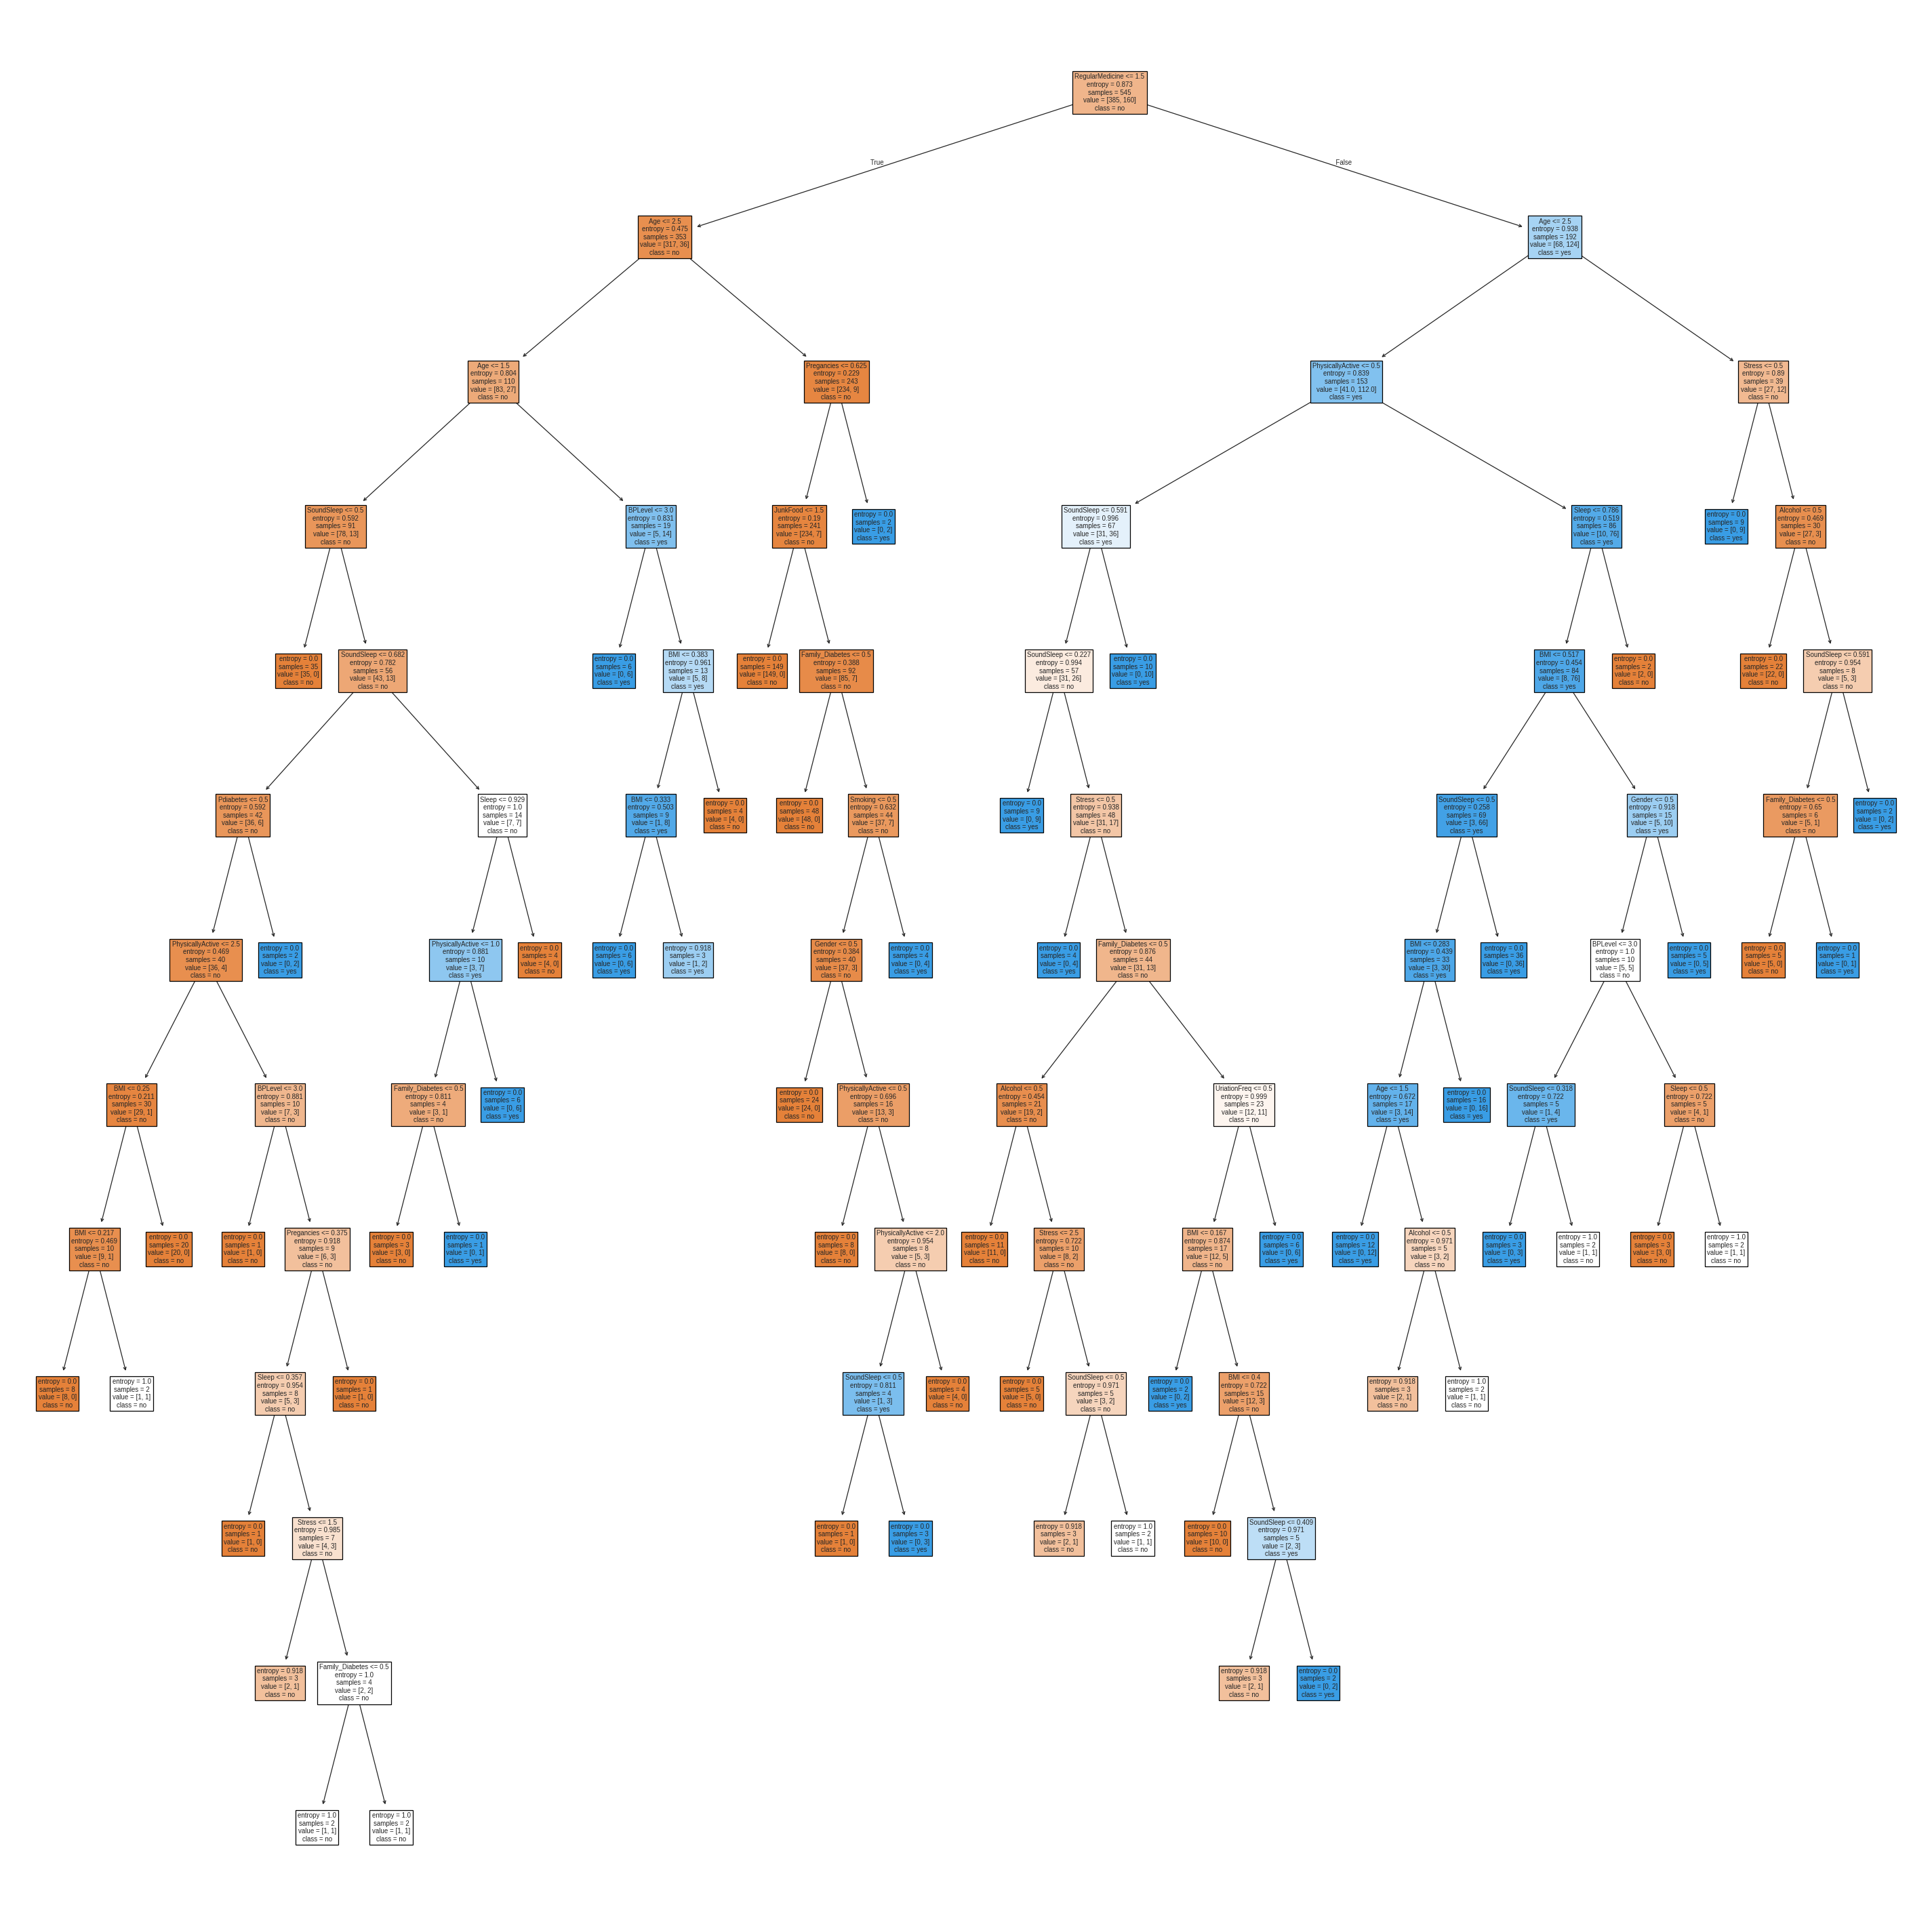

In [ ]:
# Entropy
# Setting dpi = 300 to make image clearer than default
fig, axes = plt.subplots(nrows = 1,ncols = 1, figsize = (12,12), dpi=300)
tree.plot_tree(Classifier_Entropy_PartitonTwo,feature_names=fn,class_names=ClassNames,filled=True);


Partiton 2: 60% training and 40% test (Gini)


---



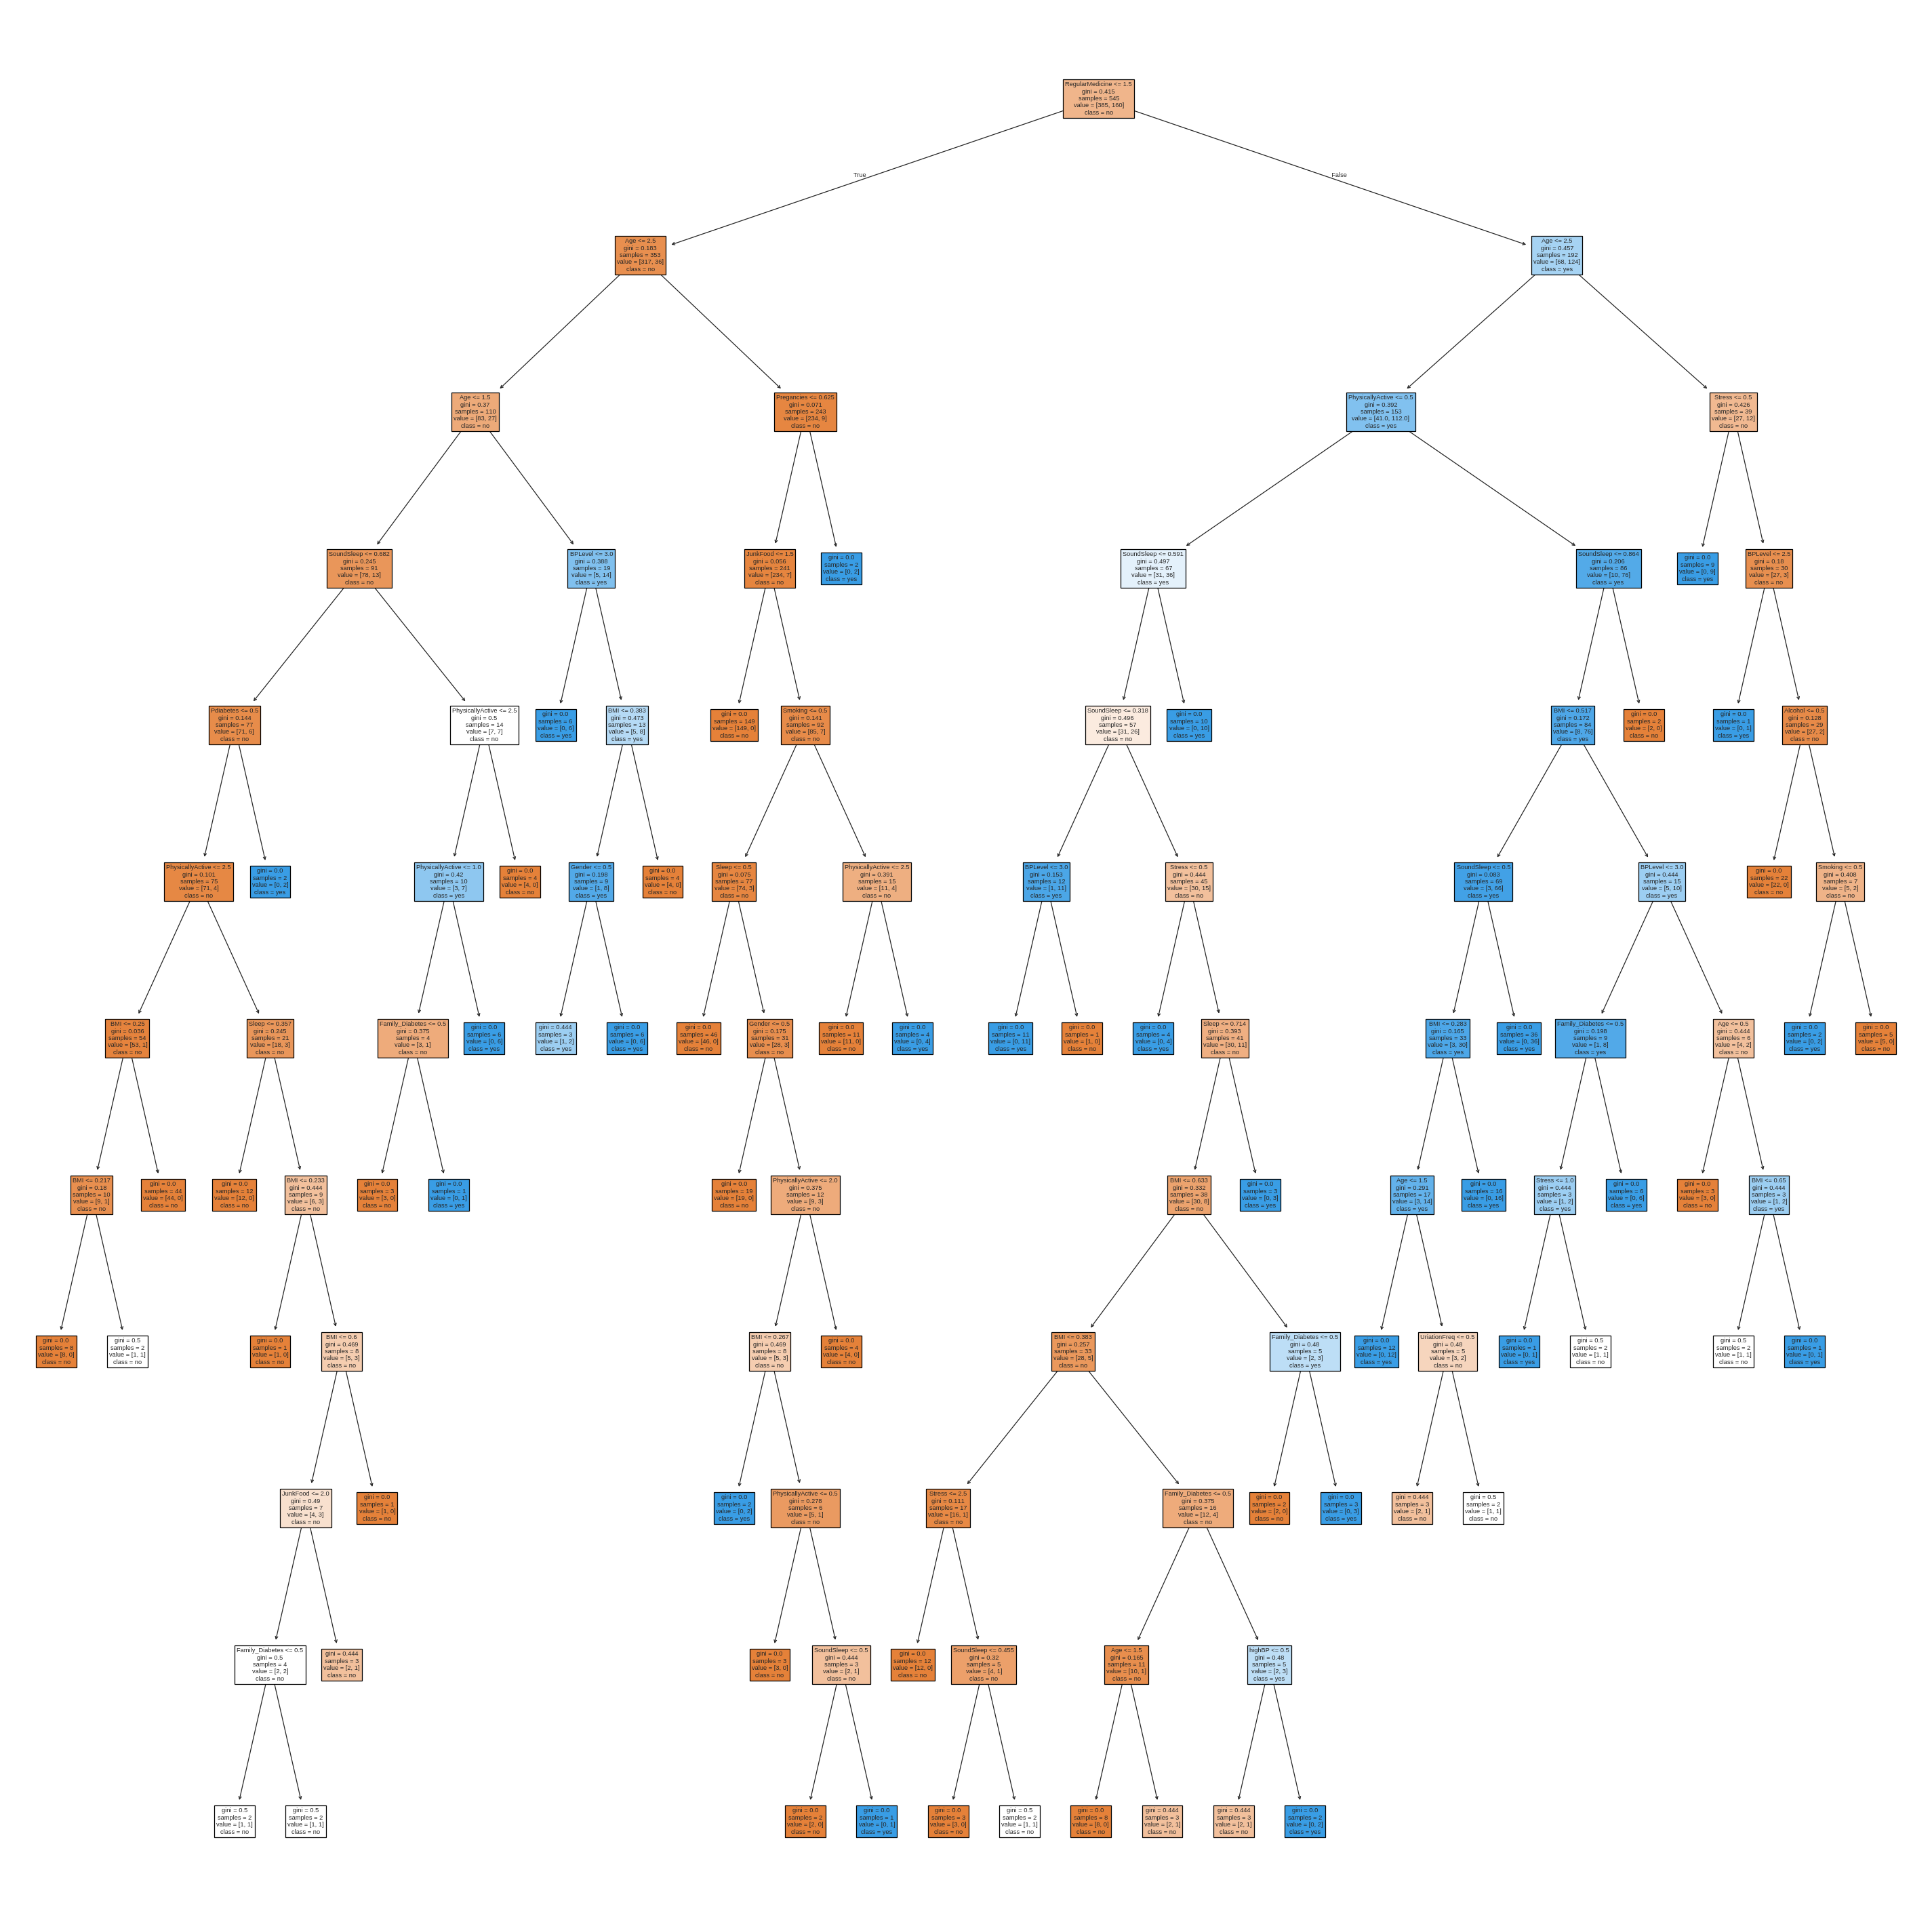

In [ ]:
# Gini
# Setting dpi = 300 to make image clearer than default
fig, axes = plt.subplots(nrows = 1,ncols = 1, figsize = (12,12), dpi=300)
tree.plot_tree(Classifier_Gini_PartitonTwo,feature_names=fn,class_names=ClassNames,filled=True);


**Conclusion Regarding Partiton 3 Resulting Tree:**


---
For partition 3, the Gini and entropy-based decision trees differ as follows:

 • Gini Tree: It’s more compact with fewer splits, suggesting an efficient structure that may generalize better on unseen data due to simplicity.

 • Entropy Tree: It’s deeper with more splits, aiming for higher purity in nodes. This may increase accuracy on training data but risks overfitting.

Conclusion: The Gini tree offers a simpler, potentially more generalizable model, while the entropy tree provides a more complex structure that may overfit.


Partiton 3: 80% training and 20% test (Entropy)


---



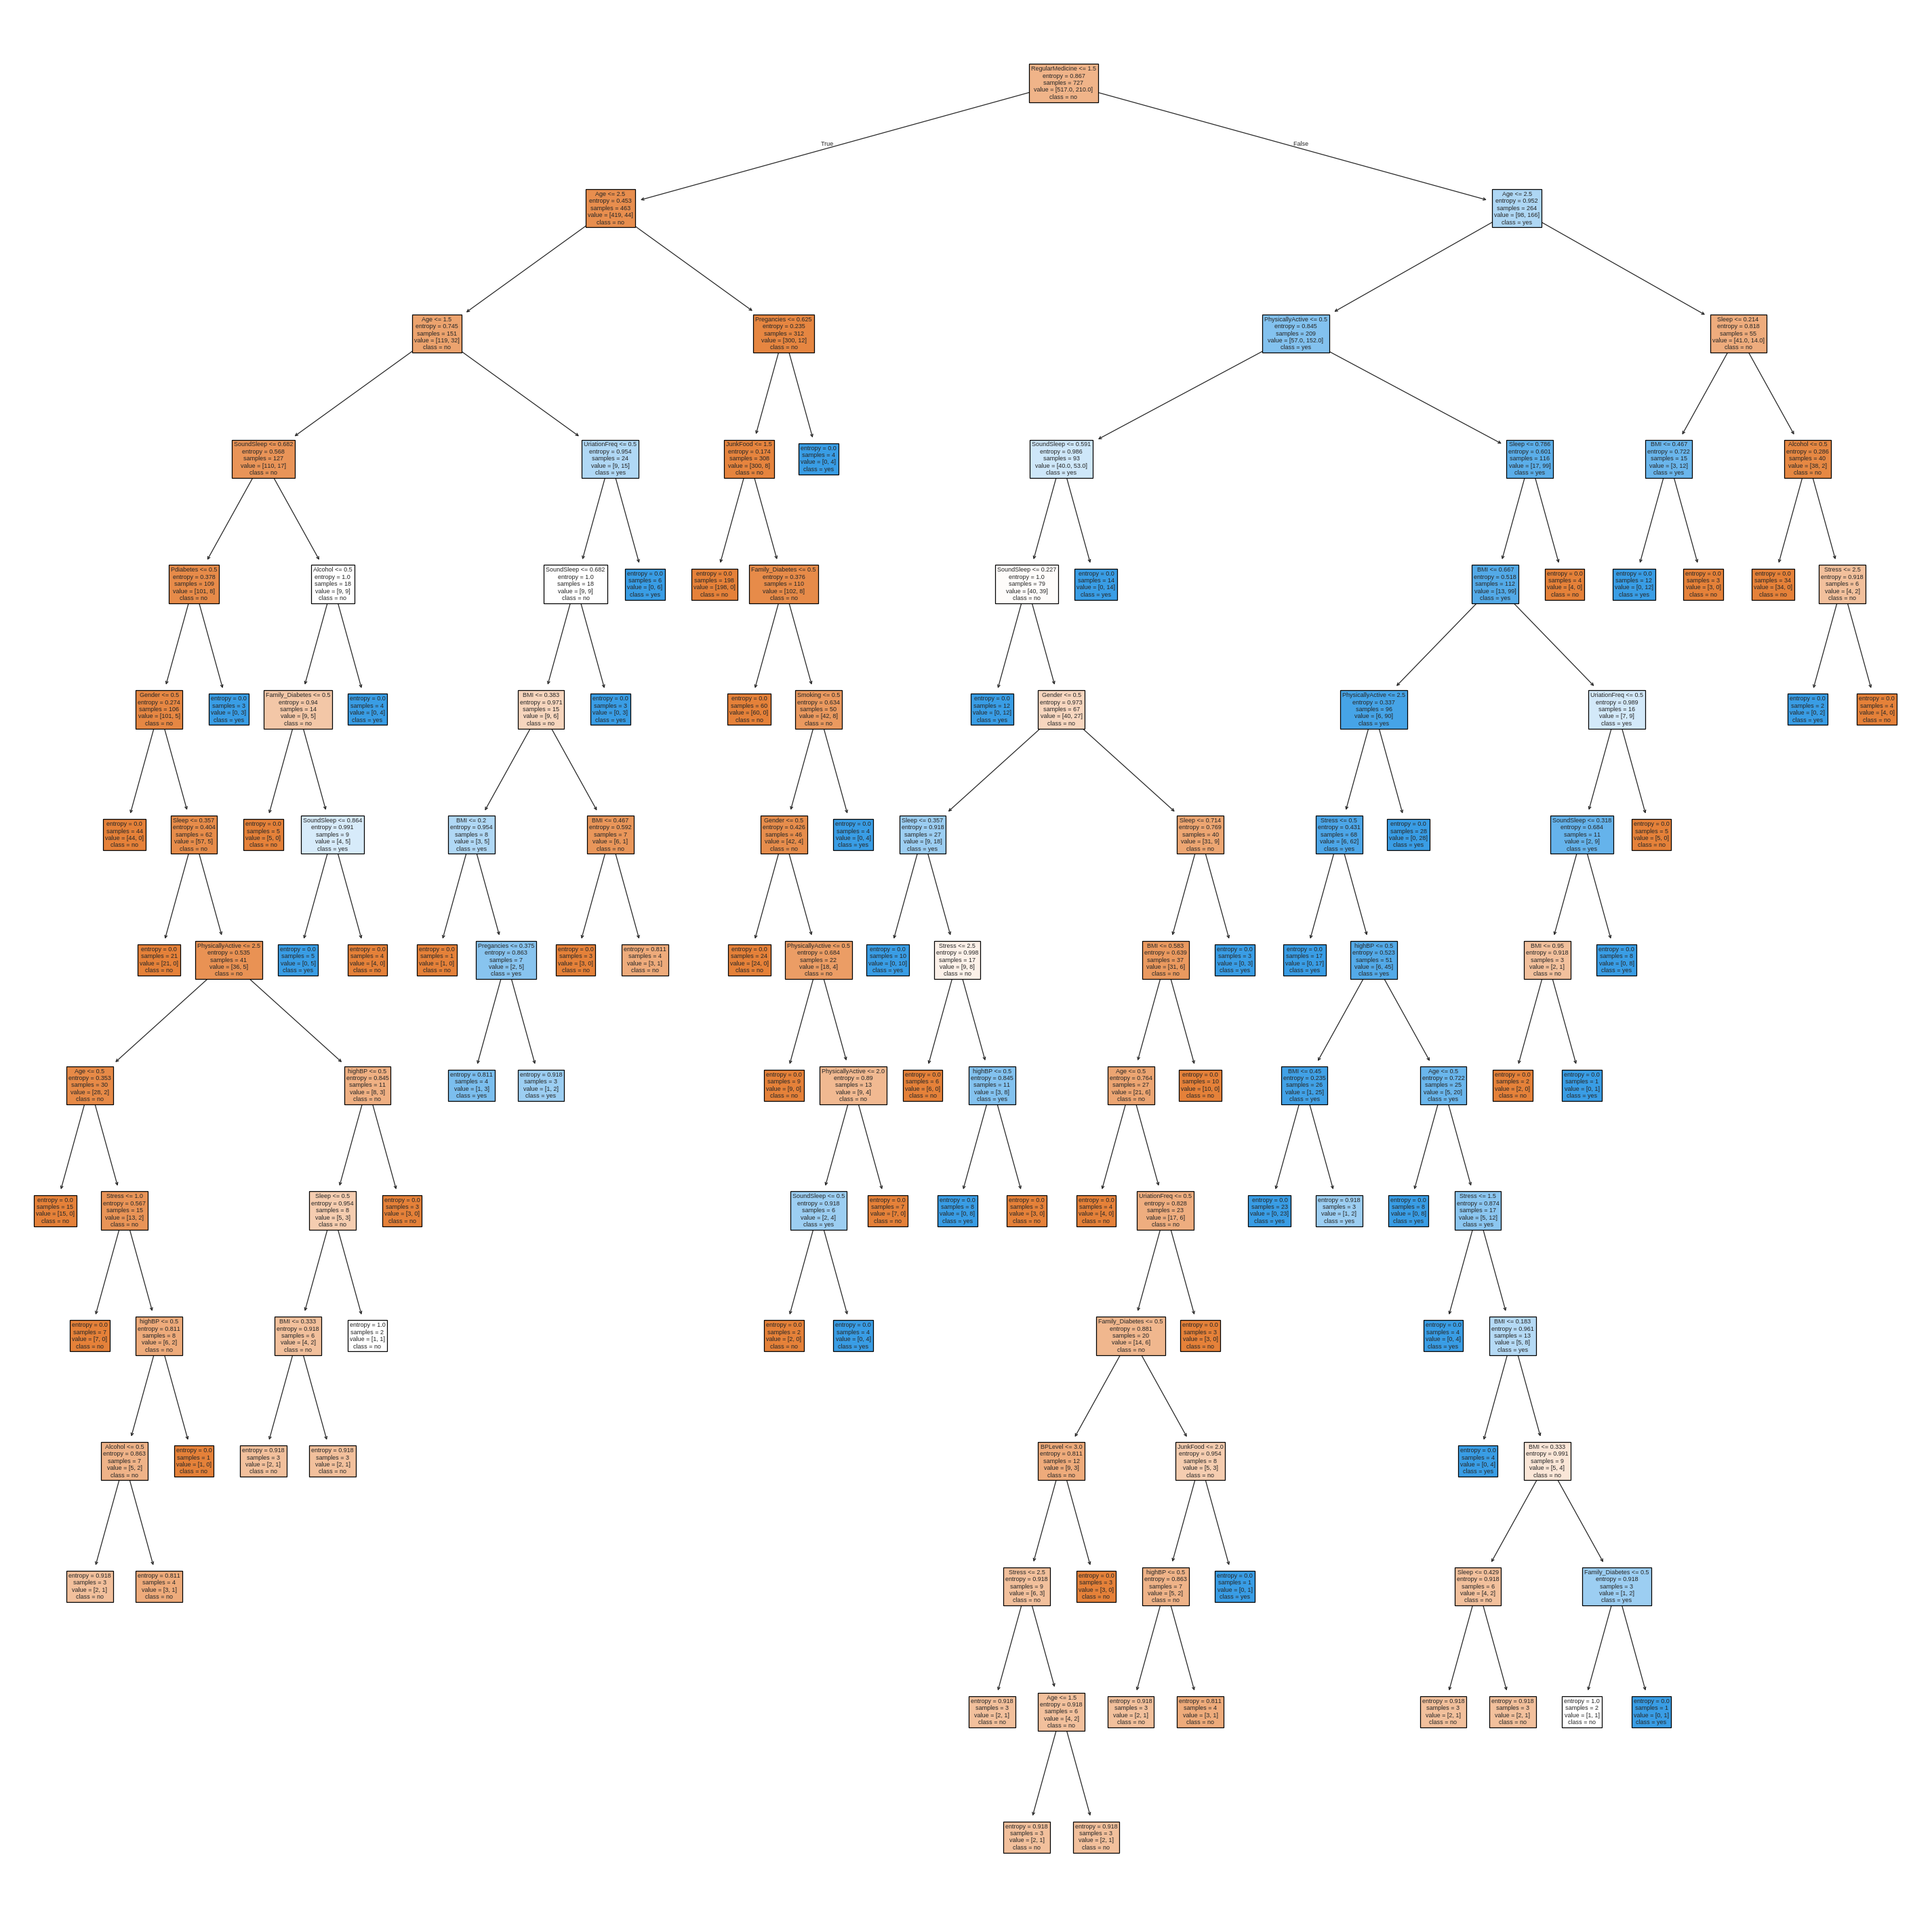

In [ ]:
# Entropy
# Setting dpi = 300 to make image clearer than default
fig, axes = plt.subplots(nrows = 1,ncols = 1, figsize = (12,12), dpi=300)
tree.plot_tree(Classifier_Entropy_PartitonThree,feature_names=fn,class_names=ClassNames,filled=True);
fig.savefig("p3_entropy")

Partiton 3: 80% training and 20% test (Gini)


---



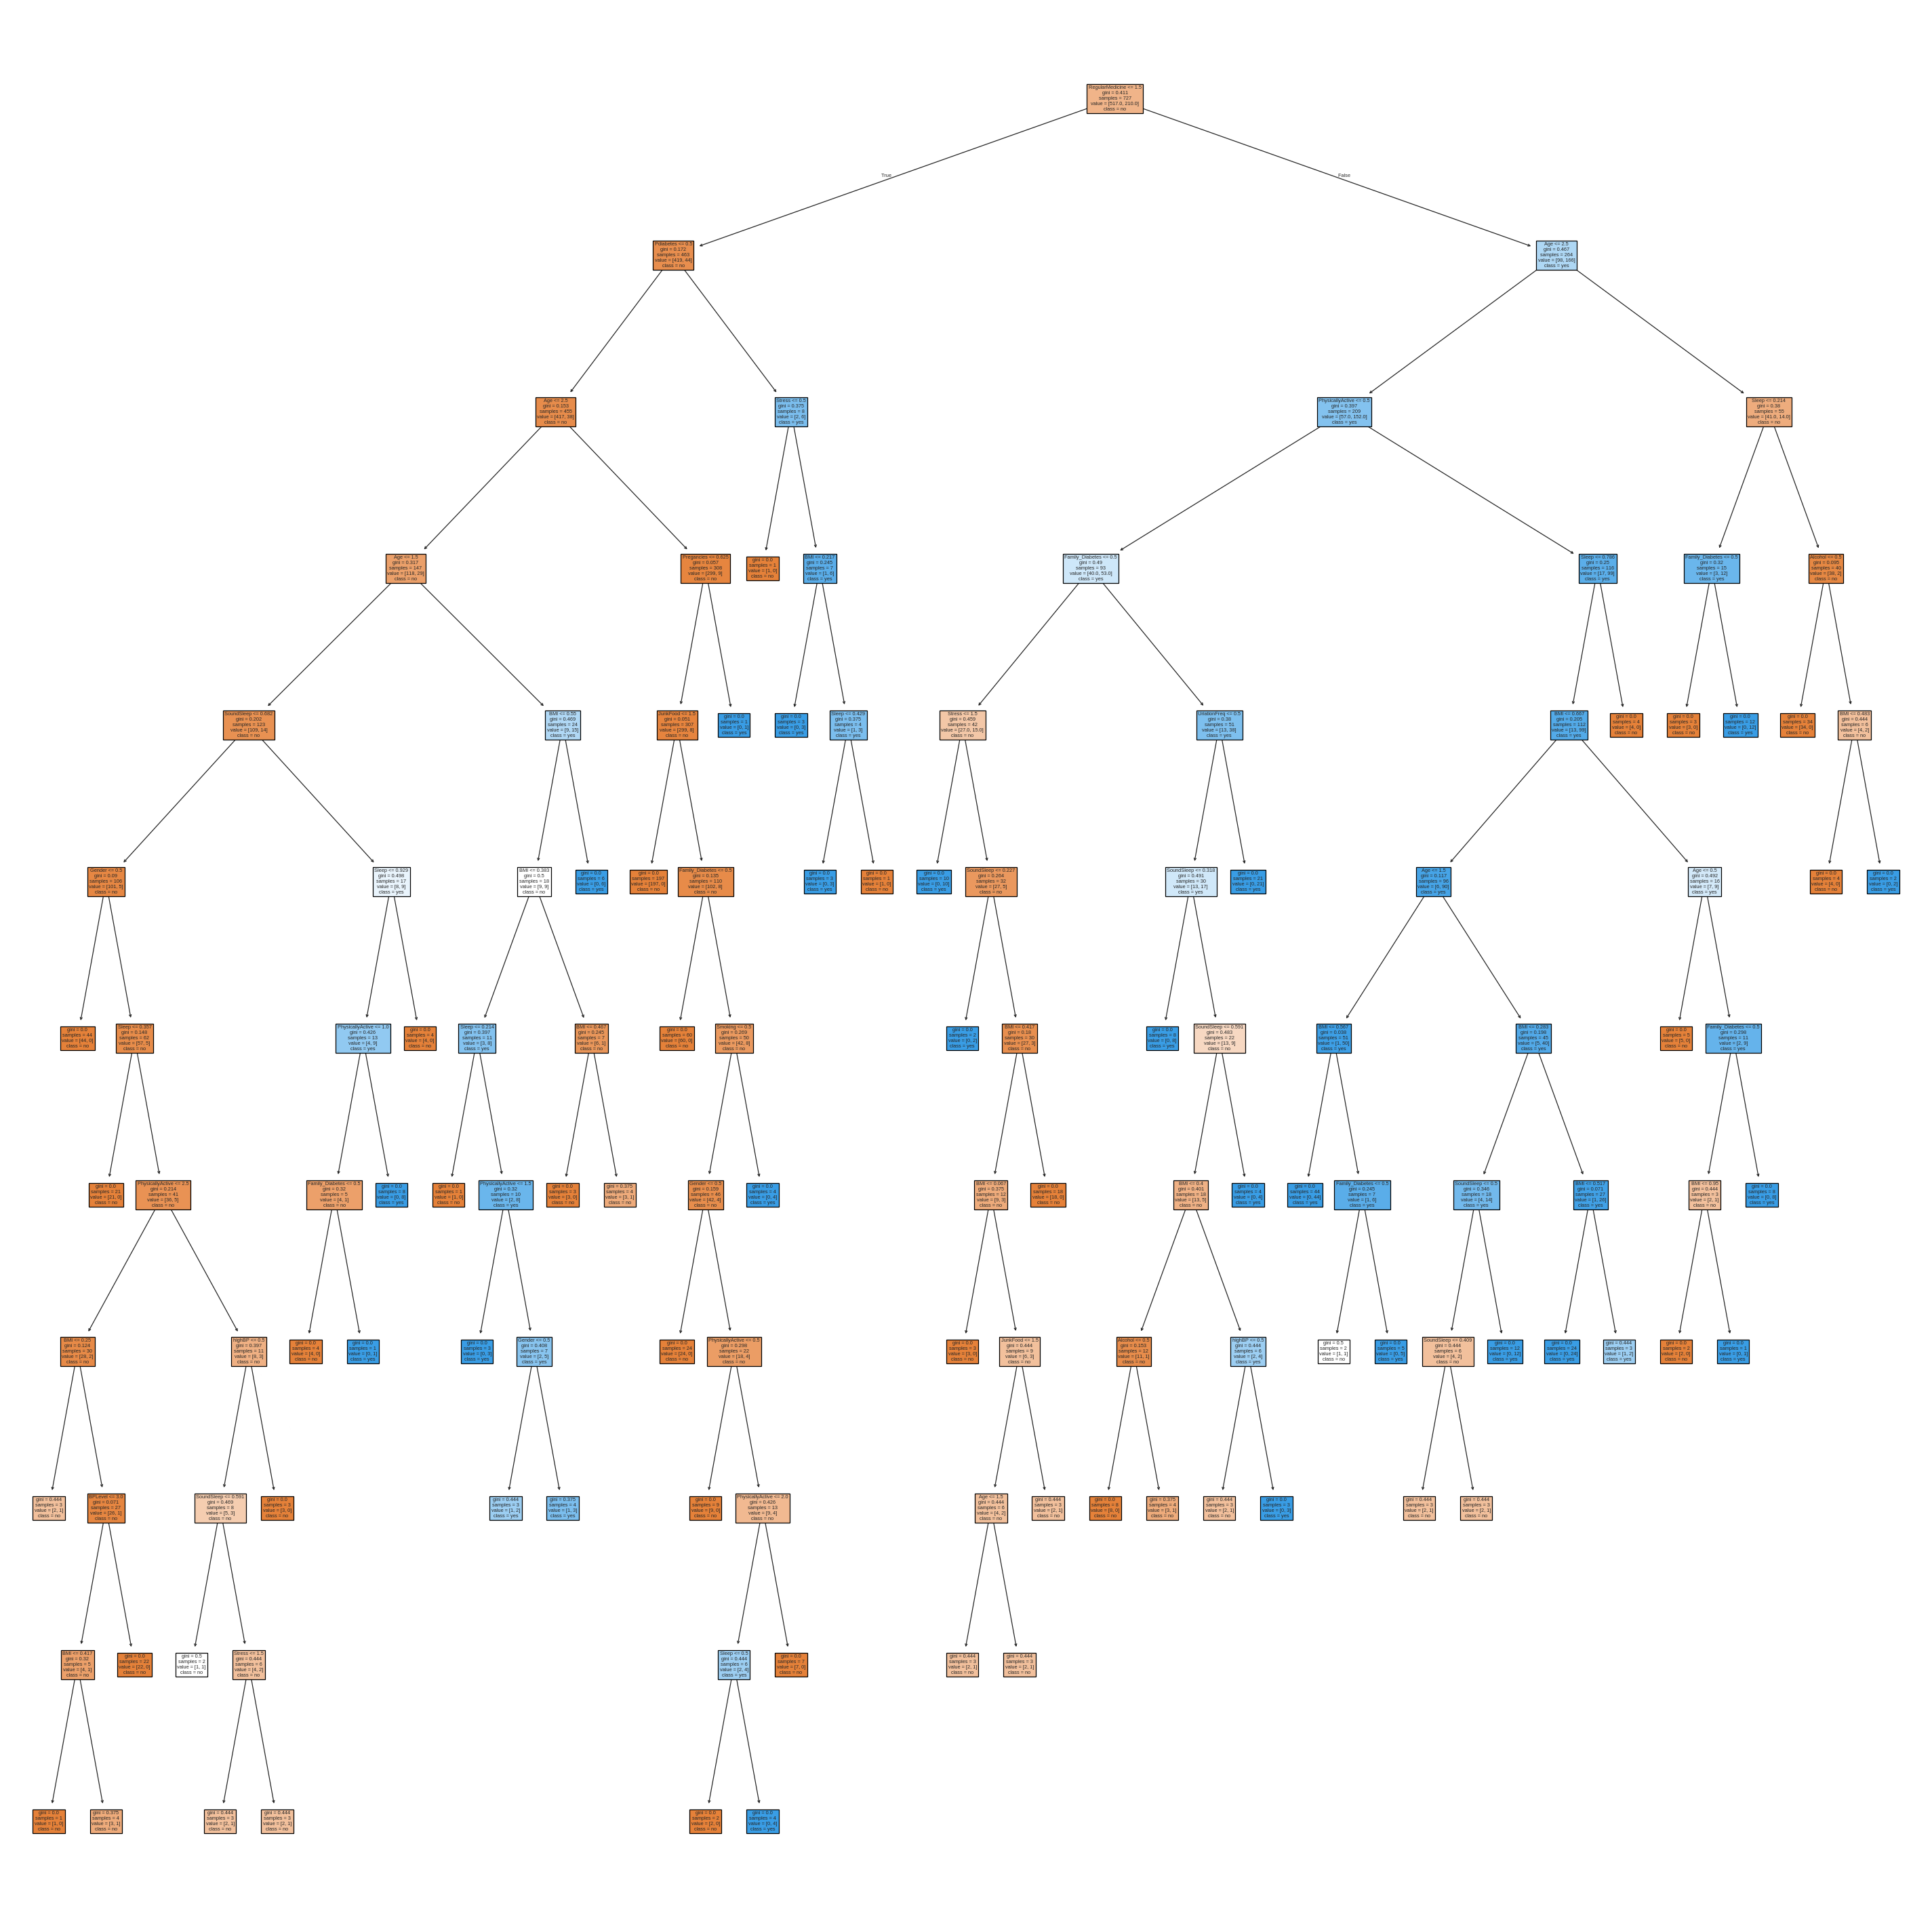

In [ ]:
# Gini
# Setting dpi = 300 to make image clearer than default
fig, axes = plt.subplots(nrows = 1,ncols = 1, figsize = (12,12), dpi=300)
tree.plot_tree(Classifier_Gini_PartitonThree,feature_names=fn,class_names=ClassNames,filled=True);
fig.savefig("p3_gini")

**Conclusion Regarding All 3 Partitons  Resulting Tree:**


---
After comparing all three partitions with both Gini and entropy criteria, here is a summary of the results across partitions to determine the best one:

Comparison Across Partitions

 1. Partition 1:

 • Gini: Partition 1 with Gini was relatively deep but balanced in splits, showing good performance with moderate complexity.

 • Entropy: The entropy tree for this partition was complex, suggesting more focus on purity, but potentially leading to overfitting.
 2. Partition 2:

 • Gini: Partition 2 with Gini produced a deeper tree with more splits, indicating higher accuracy on training but a risk of overfitting due to complexity.

 • Entropy: The entropy tree for Partition 2 was slightly more compact than the Gini tree, suggesting a better balance between accuracy and generalization.
 3. Partition 3:

 • Gini: The Gini tree for Partition 3 was compact and efficient, likely generalizing well without unnecessary complexity.

 • Entropy: The entropy tree for Partition 3 was detailed but somewhat simpler compared to previous partitions, showing a balance between purity and efficiency.

Best Partition

Partition 3 appears to be the best choice based on the following reasons:

 • Gini Index Tree: In Partition 3, the Gini-based tree was the most compact across all partitions, suggesting a model with good generalization and less risk of overfitting.

 • Entropy Tree: The entropy-based tree in Partition 3 was also more balanced in terms of depth and complexity compared to previous partitions, providing an efficient model without excessive splits.

Conclusion

Partition 3, with both Gini and entropy criteria, provides a balanced structure with manageable complexity and likely the best generalization performance. It achieves an optimal trade-off between model simplicity and purity, making it the preferred partition.


**Test Data**


---
The code generates a small sample dataset and applies label encoding to all categorical columns, transforming them into numerical values so that the dataset can be used in prediction. This encoding step ensures that the model can process and interpret the categorical data effectively. Additionally, Min-Max Scaling is applied to numerical columns (e.g., BMI, Sleep, SoundSleep, and Pregnancies) to normalize their values to a range between 0 and 1.

In [54]:
# Generate a small sample dataset
sample_data = pd.DataFrame({
    'Age': ['30-39', '40-49', '50-59', '30-39', '40-49'],
    'Gender': ['Female', 'Male', 'Female', 'Male', 'Female'],
    'Family_Diabetes': ['yes', 'no', 'yes', 'no', 'yes'],
    'highBP': ['no', 'yes', 'yes', 'no', 'yes'],
    'PhysicallyActive': ['less than half an hr', 'one hr or more', 'one hr or more',
                         'less than half an hr', 'one hr or more'],
    'BMI': [23.5, 27.8, 30.2, 25.6, 26.1],
    'Smoking': ['yes', 'no', 'yes', 'no', 'yes'],
    'Alcohol': ['no', 'yes', 'no', 'yes', 'no'],
    'Sleep': [6, 7, 5, 6, 7],
    'SoundSleep': [5, 6, 4, 5, 6],
    'RegularMedicine': ['no', 'yes', 'no', 'yes', 'no'],
    'JunkFood': ['occasionally', 'very often', 'occasionally', 'very often', 'occasionally'],
    'Stress': ['sometimes', 'often', 'sometimes', 'rarely', 'sometimes'],
    'BPLevel': ['normal', 'high', 'high', 'normal', 'normal'],
    'Pregancies': [1, 0, 2, 0, 3],
    'Pdiabetes': [0, 1, 1, 0, 1],
    'UriationFreq': ['not much', 'frequent', 'frequent', 'not much', 'frequent'],

})

sample_data["Age"]=encoder.fit_transform(sample_data["Age"])

sample_data["Gender"]=encoder.fit_transform(sample_data["Gender"])

sample_data["Family_Diabetes"]=encoder.fit_transform(sample_data["Family_Diabetes"])

sample_data["highBP"]=encoder.fit_transform(sample_data["highBP"])

sample_data["PhysicallyActive"]=encoder.fit_transform(sample_data["PhysicallyActive"])

sample_data["Smoking"]=encoder.fit_transform(sample_data["Smoking"])

sample_data["Alcohol"]=encoder.fit_transform(sample_data["Alcohol"])

sample_data["RegularMedicine"]=encoder.fit_transform(sample_data["RegularMedicine"])

sample_data["JunkFood"]=encoder.fit_transform(sample_data["JunkFood"])

sample_data["BPLevel"]=encoder.fit_transform(sample_data["BPLevel"])

sample_data["UriationFreq"]=encoder.fit_transform(sample_data["UriationFreq"])

sample_data["Stress"]=encoder.fit_transform(sample_data["Stress"])

from sklearn.preprocessing import MinMaxScaler

# Columns to scale
columns_to_scale = ['BMI', 'Sleep', 'SoundSleep', 'Pregancies']

# Initialize the Min-Max Scaler
scaler = MinMaxScaler()

# Perform Min-Max Scaling
sample_data[columns_to_scale] = scaler.fit_transform(sample_data[columns_to_scale])



**Save**


---
The code saves the trained classifiers for each partition (1, 2, and 3) using Gini and Entropy into .sav files with pickle.


In [55]:
# partition_one _entropy
partition_one_entropy='partition_one _entropy.sav'
pickle.dump(Classifier_Entropy_PartitonOne,open(partition_one_entropy,'wb'))

# partition_Two _entropy
partition_Two_entropy='partition_Two_entropy.sav'
pickle.dump(Classifier_Entropy_PartitonTwo,open(partition_Two_entropy,'wb'))

# partition_Three_entropy
partition_Three_entropy='partition_Three_entropy.sav'
pickle.dump(Classifier_Entropy_PartitonThree,open(partition_Three_entropy,'wb'))

# ----------------------------------------------------------------------------

# partition_one_Gini
prtition_one_Gini='prtition_one_Gini.sav'
pickle.dump(Classifier_Gini_PartitonOne,open(prtition_one_Gini,'wb'))

# partition_Two_Gini
partition_Two_Gini='partition_Two_Gini.sav'
pickle.dump(Classifier_Gini_PartitonTwo,open(partition_Two_Gini,'wb'))

# prtition_Three_Gini
prtition_Three_Gini='prtition_Three_Gini.sav'
pickle.dump(Classifier_Gini_PartitonThree,open(prtition_Three_Gini,'wb'))


**Use Model For New Prediction:**


---

The code loads the saved models built on Partition 1, 2, and 3 using the Entropy criterion, predicts the test dataset (X_PartitonNumberTest), and prints the results.The model first predicts the labels for the test dataset to evaluate its performance and then makes predictions for the new sample dataset with scaled values.This process is repeated for all three partitions.


**Conclusion Regarding the results of prediction: **

The results demonstrate the model’s ability to classify individuals as diabetic (“yes”) or not (“no”) with consistent accuracy across different partitions, validating its reliability for both test datasets and new unseen data.

In [52]:
#  predict using model built on partition 1(entropy)
print("predict using model built on partition 1(entropy)")
print()
# load model
loaded_model=pickle.load(open(partition_one_entropy,'rb'))
result=loaded_model.predict(X_PartitonOneTest)
print("predict for test dataset: \n",result)


# Make prediction with model
prediction =loaded_model.predict(sample_data)
print("predict for test for new new dataset: \n",prediction)

# -------------------------------------------------------------
#  predict using model built on partition 2(entropy)
print("\npredict using model built on partition 2(entropy)")
print()
# load model
loaded_model=pickle.load(open(partition_Two_entropy,'rb'))
result=loaded_model.predict(X_PartitonTwoTest)
print("predict for test dataset: \n",result)


# Make prediction with model
prediction =loaded_model.predict(sample_data)
print("predict for test for new new dataset: \n",prediction)


# -------------------------------------------------------------
#  predict using model built on partition 3(entropy)
print("\npredict using model built on partition 3(entropy)")
print()
# load model
loaded_model=pickle.load(open(partition_Three_entropy,'rb'))
result=loaded_model.predict(X_PartitonThreeTest)
print("predict for test dataset: \n",result)



# Make prediction with model
prediction =loaded_model.predict(sample_data)
print("predict for new new dataset: \n",prediction)


predict using model built on partition 1(entropy)

predict for test dataset: 
 ['yes' 'no' 'no' 'yes' 'no' 'no' 'no' 'yes' 'no' 'no' 'yes' 'no' 'no' 'no'
 'no' 'no' 'no' 'no' 'no' 'no' 'yes' 'no' 'no' 'no' 'no' 'no' 'yes' 'no'
 'no' 'yes' 'yes' 'no' 'no' 'no' 'no' 'yes' 'no' 'no' 'no' 'yes' 'no'
 'yes' 'no' 'no' 'yes' 'no' 'yes' 'no' 'no' 'yes' 'yes' 'yes' 'no' 'yes'
 'no' 'no' 'no' 'yes' 'no' 'no' 'yes' 'yes' 'yes' 'no' 'no' 'yes' 'yes'
 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no'
 'no' 'no' 'yes' 'no' 'no' 'yes' 'no' 'no' 'no' 'yes' 'yes' 'yes' 'yes'
 'no' 'no' 'no' 'no' 'no' 'no' 'yes' 'no' 'no' 'no' 'no' 'no' 'no' 'no'
 'no' 'no' 'no' 'yes' 'no' 'yes' 'no' 'no' 'yes' 'no' 'no' 'no' 'no' 'no'
 'yes' 'no' 'no' 'yes' 'yes' 'yes' 'no' 'yes' 'no' 'no' 'no' 'no' 'yes'
 'no' 'yes' 'no' 'no' 'no' 'yes' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'yes'
 'no' 'no' 'no' 'no' 'no' 'no' 'yes' 'no' 'no' 'no' 'yes' 'no' 'no' 'no'
 'yes' 'no' 'no' 'no' 'yes' 'no' 'no' 'no' 'no' 'n

**Use Model For New Prediction:**


---


The code loads the saved models built on Partition 1, 2, and 3 using the Gini criterion, predicts the test dataset (X_PartitonNumberTest), and prints the results.The model first predicts the labels for the test dataset to evaluate its performance and then makes predictions for the new sample dataset with scaled values.This process is repeated for all three partitions.

**Conclusion Regarding the results of prediction: **

The results show the model effectively classifies individuals as diabetic (“yes”) or not (“no”) with consistent performance across partitions, demonstrating its reliability and generalization.

In [53]:
#  predict using model built on partition 1(gini)
# load model
print("predict using model built on partition 1(gini)")
print()
loaded_model=pickle.load(open(prtition_one_Gini,'rb'))
result=loaded_model.predict(X_PartitonOneTest)
print("predict for test dataset: \n",result)


# Make prediction with model
prediction =loaded_model.predict(sample_data)
print("predict for test for new new dataset: \n",prediction)

# ---------------------------------------------------------
#  predict using model built on partition 1(gini)
# load model
print("\npredict using model built on partition 2(gini)")
print()
loaded_model=pickle.load(open(partition_Two_Gini,'rb'))
result=loaded_model.predict(X_PartitonTwoTest)
print("predict for test dataset: \n",result)


# Make prediction with model
prediction =loaded_model.predict(sample_data)
print("predict for test for new new dataset: \n",prediction)


# ---------------------------------------------------------
#  predict using model built on partition 3(gini)
# load model
print("\npredict using model built on partition 3(gini)")
print()
loaded_model=pickle.load(open(prtition_Three_Gini,'rb'))
result=loaded_model.predict(X_PartitonThreeTest)
print("predict for test dataset: \n",result)


# Make prediction with model
prediction =loaded_model.predict(sample_data)
print("predict for test for new new dataset: \n",prediction)

predict using model built on partition 1(gini)

predict for test dataset: 
 ['yes' 'no' 'no' 'yes' 'no' 'no' 'no' 'yes' 'no' 'no' 'yes' 'no' 'no' 'no'
 'no' 'no' 'no' 'no' 'no' 'no' 'yes' 'no' 'no' 'no' 'no' 'no' 'yes' 'no'
 'no' 'yes' 'yes' 'no' 'no' 'no' 'no' 'yes' 'no' 'no' 'no' 'yes' 'no'
 'yes' 'no' 'no' 'yes' 'no' 'yes' 'no' 'no' 'yes' 'yes' 'yes' 'no' 'yes'
 'no' 'no' 'no' 'yes' 'no' 'no' 'yes' 'no' 'yes' 'no' 'no' 'yes' 'yes'
 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no'
 'no' 'no' 'yes' 'no' 'no' 'yes' 'no' 'no' 'no' 'yes' 'yes' 'yes' 'yes'
 'no' 'no' 'no' 'no' 'no' 'no' 'yes' 'no' 'no' 'no' 'no' 'no' 'no' 'no'
 'no' 'no' 'no' 'yes' 'no' 'yes' 'no' 'no' 'yes' 'no' 'no' 'no' 'no' 'no'
 'yes' 'no' 'no' 'yes' 'yes' 'yes' 'no' 'yes' 'no' 'no' 'no' 'no' 'yes'
 'no' 'yes' 'no' 'no' 'no' 'yes' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'yes'
 'no' 'no' 'no' 'no' 'no' 'no' 'yes' 'no' 'no' 'no' 'yes' 'no' 'no' 'no'
 'yes' 'no' 'no' 'no' 'yes' 'no' 'no' 'no' 'no' 'no' '

#Clustring


---
Clustering is an unsupervised learning task that does not require labeled data, so we will remove the class label from the dataset, as it is not needed for our analysis.

After removing the class label, we will scale the attributes to standardize them. Standardizing ensures that all attributes are on a similar scale, preventing any one attribute from disproportionately influencing the clustering process due to differences in magnitude.



In [ ]:

features = Dataset.drop(Dataset.columns [17], axis=1) # Replace 'target_column' with your actual target column
features=features.select_dtypes(include=[np.number])
# Use StandardScaler to scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
# Create a new DataFrame with the scaled features
diabetic_scaled = pd.DataFrame (scaled_features, columns=features.columns)
# Display the scaled DataFrame
print("\nScaled DataFrame:")
print(diabetic_scaled.head ())


Scaled DataFrame:
        BMI     Sleep  SoundSleep  Pregancies  Pdiabetes
0  2.560976  0.813939    0.244340   -0.425834   -0.12507
1  0.471907  0.813939    0.244340   -0.425834   -0.12507
2 -0.287754 -0.740411    0.244340   -0.425834   -0.12507
3 -0.477670  0.813939    0.244340   -0.425834   -0.12507
4  0.281992  0.813939    1.314726   -0.425834   -0.12507


#K-selection


---


To select three different values of k for K-means clustering, we will base our choices on the results of our validation methods(Elbow method ,Silhouette). We’ll select one relatively large value for k, one intermediate, and one small. This approach will allow us to explore a range of clustering outcomes and increase the likelihood of finding the optimal clustering configuration.

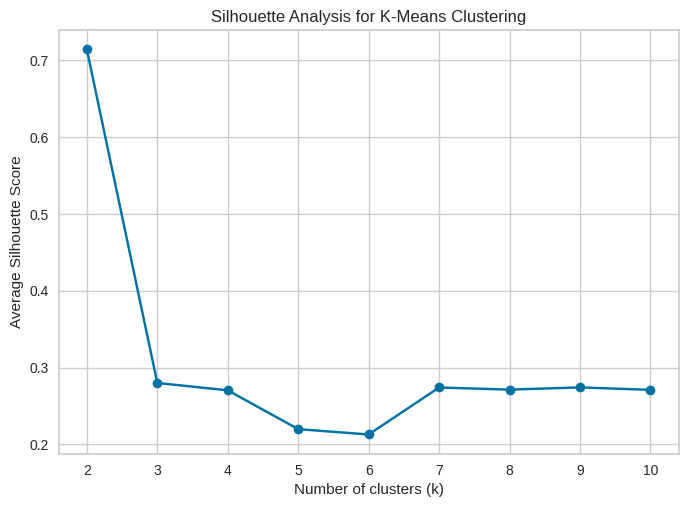

In [ ]:
# k selection

k_values = range(2, 11)
silhouette_avg_values = []
for k in k_values:
 kmeans = KMeans (n_clusters=k, random_state=43)
 kmeans_result = kmeans.fit(diabetic_scaled)
 silhouette_avg = silhouette_score(diabetic_scaled, kmeans_result.labels_)
 silhouette_avg_values.append(silhouette_avg)

 #Finding the first highest average Silhoutte score

highest_k = k_values[np.argmax(silhouette_avg_values)]
highest_score = max(silhouette_avg_values)

# Finding the second highest average Silhouette score
silhouette_avg_values_sorted = sorted(silhouette_avg_values, reverse=True)
secondHighest_score = silhouette_avg_values_sorted[1]
secondHighest_k = k_values[silhouette_avg_values.index(secondHighest_score)]
# Plot the silhouette scores for different values of k
plt.plot(k_values, silhouette_avg_values, marker='o')
plt.title('Silhouette Analysis for K-Means Clustering')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Average Silhouette Score')
plt.show()

 As we can see above the first highest average is k=2 with average=0.73, And the second highest average is k=3 with average =0.28. based on that we obtaind that the optimal number of clusters is k=2 and k=3

Elbow method for optimal k:

The elbow method helps us choose the best number of clusters for K-means clustering. It works by testing different numbers of clusters and calculating how tightly grouped the data points are within each cluster. As we increase the number of clusters, the clusters get smaller and more compact, which reduces WCSS. However, after a certain point, adding more clusters doesn’t make much difference in compactness—this is the “elbow” point on the graph. The elbow point suggests the ideal number of clusters, as it shows where adding more clusters no longer improves the results much, so we can say that the elbow value is the third k we will choose for th k-means algorithm.

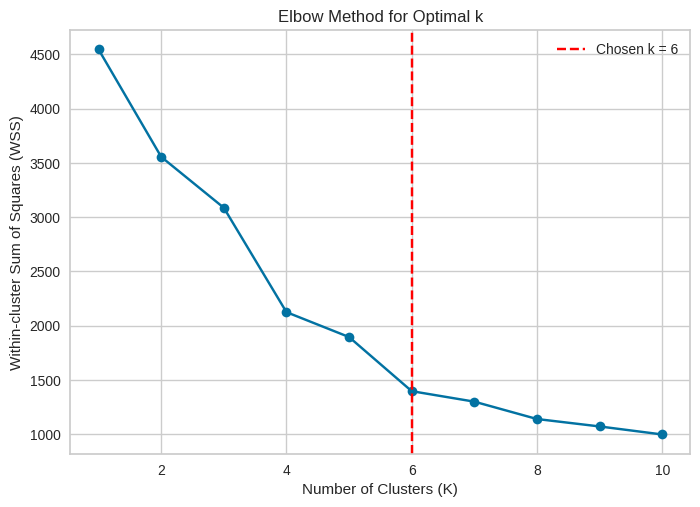

In [ ]:
# Perform k-means clustering for different values of k
D = diabetic_scaled

# Standardize the data
scaler = StandardScaler()
D_scaled = scaler.fit_transform(D)
wss_values = []
k_values = range (1, 11)
for k in k_values:
 kmeans = make_pipeline(StandardScaler(), KMeans(n_clusters=k, n_init='auto',random_state=1))
 kmeans.fit(D_scaled)
 wss_values.append(kmeans.named_steps['kmeans'].inertia_)

# Plot the elbow method
plt.plot(k_values, wss_values, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-cluster Sum of Squares (WSS)')
plt.title('Elbow Method for Optimal k')

knee=KneeLocator(k_values,wss_values,curve='convex', direction='decreasing')
turning_point = knee.elbow

plt.axvline(x=turning_point,linestyle='--', color='red', label=f'Chosen k = {turning_point}')
plt.legend ()
plt.show()

K-Means Algorithm:


---



The k-means algorithm is a clustering method used to divide data into a specific number of groups (clusters) based on similarity. It aims to find clusters where data points within each group are more alike than those in different groups. This method is commonly used for organizing, simplifying, and understanding large datasets.

# k-means Algorithm using k=2

In [ ]:
# k-means using k=2
np.random.seed (43)
kmeans = KMeans(n_clusters=2, random_state=43)
kmeans_result = kmeans.fit(diabetic_scaled)
# Print the clustering result
print("Cluster Centers:")
print(kmeans_result.cluster_centers_)
print("\nCluster Labels:")
print(kmeans_result.labels_)

Cluster Centers:
[[ 9.19564775e-01  6.47401241e-01  2.44340022e-01  1.77350360e+00
   7.99553447e+00]
 [-1.43842535e-02 -1.01269468e-02 -3.82207855e-03 -2.77419557e-02
  -1.25069813e-01]]

Cluster Labels:
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1
 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 

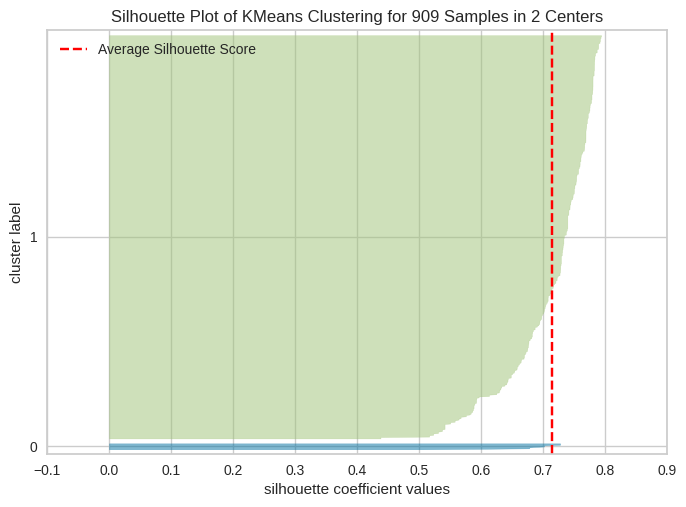

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 909 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
kmeans = KMeans(n_clusters=2,n_init='auto')
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
visualizer.fit(diabetic_scaled)
visualizer.show()

 The average silhouette score is around 0.7, which suggests a good level of separation between the two clusters. Most samples have silhouette scores above 0.5, indicating that they are well matched to their own cluster and well-separated from the other cluster. This result implies that the clustering with 2 clusters is effective and distinct.



---


Computing the wws(within-cluster sum of square) And Average silhouette score

In [ ]:
# Perform k-means clustering with k=2
kmeans = KMeans(n_clusters=2, random_state=43, n_init='auto')
kmeans.fit(diabetic_scaled)
labels = kmeans.labels_
X=diabetic_scaled
# Compute the WSS (Within-Cluster Sum of Squares)
wss = kmeans.inertia_

# Compute the Average Silhouette Score
silhouette_average = silhouette_score(X, labels)

# Print the evaluation metrics
print("WSS:", wss)
print("Average Silhouette Score:", silhouette_average)

WSS: 3572.444723720072
Average Silhouette Score: 0.7141737715527255


With a WSS of 3572.4447, Clusters show reasonable compactness, though tighter clusters would have a lower WSS.

An Average Silhouette Score of 0.71417377 indicates well-separated, distinct clusters.



---
#k-means Algorithm using k=3


In [ ]:
# k-means using k=3
np.random.seed (44)
kmeans = KMeans(n_clusters=3, random_state=44)
kmeans_result = kmeans.fit(diabetic_scaled)
# Print the clustering result
print("Cluster Centers:")
print(kmeans_result.cluster_centers_)
print("\nCluster Labels:")
print(kmeans_result.labels_)

Cluster Centers:
[[ 0.29054751 -0.55851866 -0.62832471 -0.15357595 -0.12506981]
 [-0.43144701  0.73992203  0.8503257   0.14436432 -0.12506981]
 [ 0.91956478  0.64740124  0.24434002  1.7735036   7.99553447]]

Cluster Labels:
[0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 1 1 1 0 0 1 1 1 0 1 0 1 1 1 0 1 1 1 1
 1 1 0 0 0 0 0 0 0 0 2 0 0 0 0 1 1 0 0 1 0 0 1 1 0 1 1 0 1 1 0 0 0 0 1 1 0
 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 1 1 0 1 1 1 2 2 1 1 1 2 1 0
 0 1 1 2 0 0 0 0 2 0 0 0 0 0 0 0 1 1 0 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1
 0 1 1 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0
 0 0 1 1 1 1 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 1 1 1 0 0 1 1 1 0
 1 0 1 1 1 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 2 0 0 0 0 1 1 0 0 1 0 0 1 1 0 1 1
 0 1 1 0 0 0 0 1 1 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 1 1 0 1
 1 1 2 1 1 1 1 2 1 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 1 0 0 1 0 1 0
 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 1 1 1 1 1 1 1 1 1

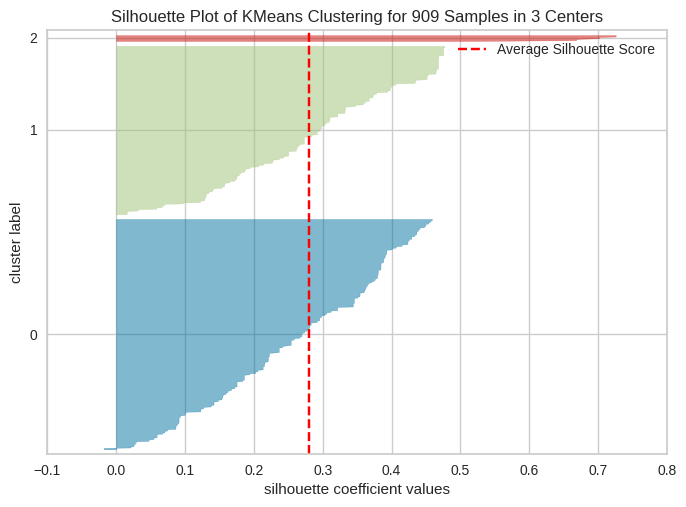

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 909 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
kmeans = KMeans(n_clusters=3,n_init='auto')
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
visualizer.fit(diabetic_scaled)
visualizer.show()

 the average silhouette score is around 0.3. This score suggests moderate separation between clusters, though there may be some overlap. Most points fall between 0.1 and 0.5 on the silhouette coefficient scale, indicating that some samples are well matched to their clusters, while others may not be as clearly assigned.



---



Computing the wws(within-cluster sum of square) And Average silhouette score

In [ ]:
# Perform k-means clustering with k=3
kmeans = KMeans(n_clusters=3, random_state=44, n_init='auto')
kmeans.fit(diabetic_scaled)
labels = kmeans.labels_
X=diabetic_scaled
# Compute the WSS (Within-Cluster Sum of Squares)
wss = kmeans.inertia_

# Compute the Average Silhouette Score
silhouette_average = silhouette_score(X, labels)

# Print the evaluation metrics
print("WSS:", wss)
print("Average Silhouette Score:", silhouette_average)

WSS: 2593.698963156512
Average Silhouette Score: 0.28010585446328656


With a WSS of 2593,Clusters are somewhat compact, as points within each cluster are relatively close together.

Average Silhouette Score of 0.28 is low, indicating that clusters are not very well-separated and may overlap significantly.



---



#k-means Algorithm using k=6


In [ ]:
# k-means using k=6
np.random.seed (45)
kmeans = KMeans(n_clusters=6, random_state=45)
kmeans_result = kmeans.fit(diabetic_scaled)
# Print the clustering result
print("Cluster Centers:")
print(kmeans_result.cluster_centers_)
print("\nCluster Labels:")
print(kmeans_result.labels_)

Cluster Centers:
[[ 1.62928995 -0.17160887 -0.90748831 -0.42583442 -0.12506981]
 [-1.01045943 -0.30771337 -0.31978229 -0.33072792 -0.12506981]
 [ 0.1252683  -0.78503306 -0.49059003 -0.40478813 -0.12506981]
 [ 0.91956478  0.64740124  0.24434002  1.7735036   7.99553447]
 [-0.05956808 -0.02080445  0.18487414  2.42515931 -0.12506981]
 [-0.27658293  0.93280066  1.03348729 -0.32233616 -0.12506981]]

Cluster Labels:
[0 5 2 5 5 5 5 1 5 5 1 5 1 4 1 4 1 4 5 5 5 4 4 5 5 5 1 5 2 4 4 4 2 4 4 5 4
 5 5 1 2 2 0 1 1 1 0 3 0 4 1 4 1 5 2 2 1 2 1 5 5 2 5 5 2 5 1 2 2 2 1 4 5 4
 0 5 5 1 2 2 5 5 1 2 2 2 1 1 2 1 1 1 1 5 2 2 1 5 5 2 5 5 5 3 3 1 5 5 3 5 2
 0 5 5 3 2 1 1 1 3 4 2 0 0 0 1 4 4 4 2 5 1 2 1 1 5 5 4 4 5 5 5 1 5 5 2 5 5
 2 1 5 5 2 2 5 5 0 1 1 2 2 2 5 1 1 2 1 5 2 5 2 2 2 4 5 1 4 1 1 4 0 0 0 0 2
 0 2 4 5 1 5 2 2 2 4 0 5 2 5 5 5 5 1 5 5 1 5 1 4 1 4 1 4 5 5 5 4 4 5 5 5 1
 5 2 4 4 4 2 4 4 5 4 5 5 1 2 2 0 1 1 1 0 3 0 4 1 4 1 5 2 2 1 2 1 5 5 2 5 5
 2 5 1 2 2 2 1 4 5 4 0 5 5 1 2 2 5 5 1 2 2 2 1 1 2 1 1 1 1 5 2

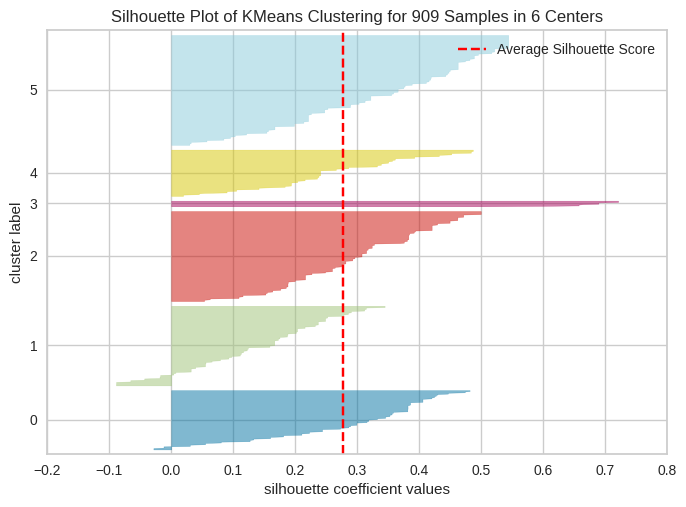

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 909 Samples in 6 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
kmeans = KMeans(n_clusters=6,n_init='auto')
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
visualizer.fit(diabetic_scaled)
visualizer.show()

The average silhouette score is low, around 0.2 to 0.3. This suggests poor separation, with some clusters overlapping or lacking distinct boundaries. Many points have low or even negative silhouette scores, indicating that they might be misclassified or not well-defined within their clusters. This clustering structure suggests significant overlap, meaning that 6 clusters may not clearly separate the data in a meaningful way.



---



Computing the wws(within-cluster sum of square) And Average silhouette score

In [ ]:
# Perform k-means clustering with k=6
kmeans = KMeans(n_clusters=6, random_state=45, n_init='auto')
kmeans.fit(diabetic_scaled)
labels = kmeans.labels_
X=diabetic_scaled
# Compute the WSS (Within-Cluster Sum of Squares)
wss = kmeans.inertia_

# Compute the Average Silhouette Score
silhouette_average = silhouette_score(X, labels)

# Print the evaluation metrics
print("WSS:", wss)
print("Average Silhouette Score:", silhouette_average)

WSS: 1422.6065986456842
Average Silhouette Score: 0.2779005375224566


A WSS of 1422.6065986456842 shows compact clusters, with points reasonably close to their cluster centers.

An Average Silhouette Score of 0.3204231 suggests that clusters lack clear separation and may overlap.


---



**Comparing the results of the three clusters:**
1.	WSS = 3572, Silhouette Score = 0.714

   •	This result has the highest silhouette score, indicating well-separated clusters, although the WSS is high, meaning clusters are less compact.

2.	WSS = 2593, Silhouette Score = 0.280

  •	The WSS is lower here, indicating
better compactness, but the silhouette score is much lower, suggesting that clusters are not well-separated.

3.	WSS = 1422.6065986456842, Silhouette Score = 0.2779005

  •	This result has the lowest WSS, showing the most compact clusters. However, the silhouette score is still low, indicating that the clusters are not clearly separated.

Conclusion

The first result (WSS = 3572, Silhouette Score = 0.714) is the best overall because, despite a higher WSS, it has a strong silhouette score, indicating well-separated clusters. This balance suggests clearer, distinct clusters compared to the other two results.



---



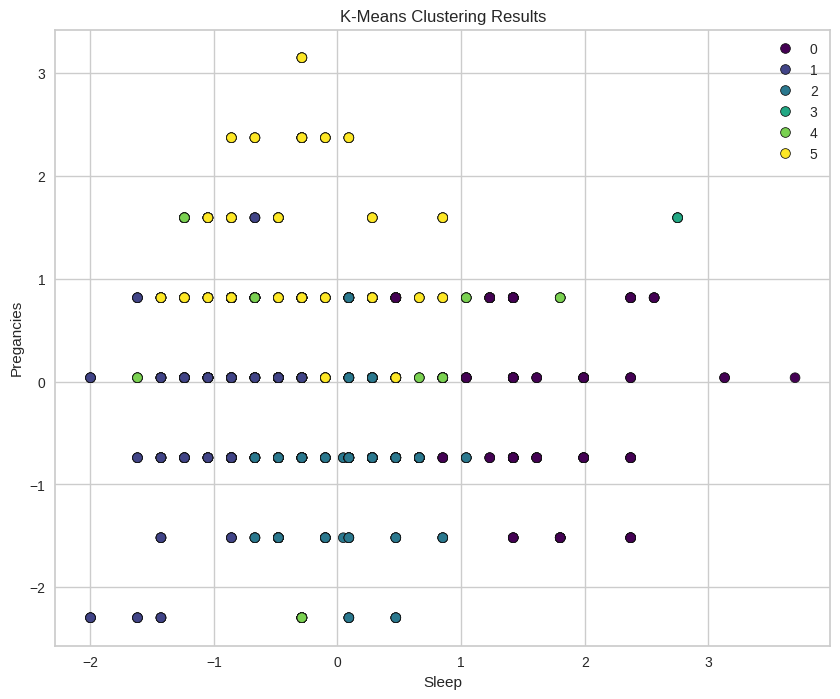

In [ ]:
diabetic_scaled['Cluster'] = kmeans_result.labels_
plt.figure(figsize= (10, 8))
sns.scatterplot(x=diabetic_scaled.columns[0],y=diabetic_scaled.columns[1],hue='Cluster',data=diabetic_scaled,palette='viridis',edgecolors='k')
plt.title('K-Means Clustering Results')
plt.xlabel(diabetic_scaled.columns[1])
plt.ylabel(diabetic_scaled.columns[3])
plt.legend ()
plt.show()

k-means clustering with estimating k and initializations:


---



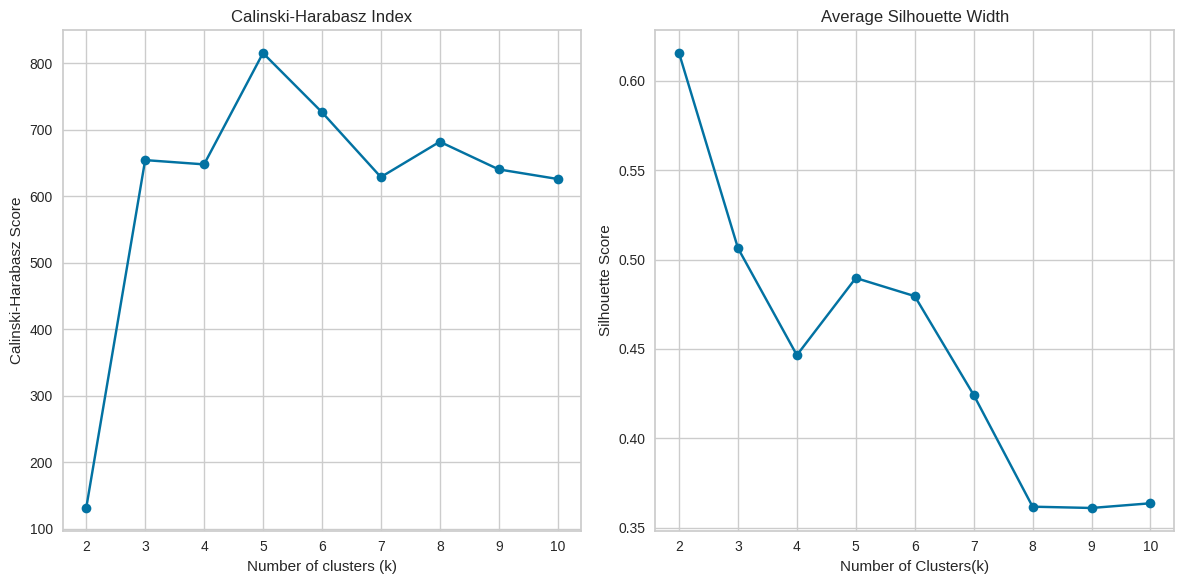

In [ ]:
# Range of clusters to try
k_range = range (2, 11)
# Lists to store scores
ch_scores = []
silhouette_scores =[]
# Calculate scores for each value of k
for k in k_range:
  kmeans = KMeans (n_clusters=k, random_state=43)
  kmeans. fit (diabetic_scaled)
  ch_score = calinski_harabasz_score (diabetic_scaled, kmeans. labels_)
  silhouette_avg = silhouette_score(diabetic_scaled, kmeans. labels_)
  ch_scores.append (ch_score)
  silhouette_scores.append(silhouette_avg)

#---------------------
# Plotting results
plt.figure(figsize=(12, 6))
# Plot Calinski-Harabasz Index
plt.subplot(1, 2, 1)
plt.plot(k_range, ch_scores, marker='o')
plt.title( 'Calinski-Harabasz Index')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Calinski-Harabasz Score')
# Plot Average Silhouette Width
plt. subplot (1, 2, 2)
plt.plot(k_range, silhouette_scores, marker='o')
plt.title('Average Silhouette Width')
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Silhouette Score')
plt.tight_layout()
plt.show()